# **Predictive Modeling and Exploratory Analysis of Housing Sales Data**
**House sales for a county in Washington state**.

**Objective:**

• Predict house prices using key features (e.g., square footage, location, amenities).

• Identify trends and factors influencing housing prices.

Tools Used:

• Python (Pandas, Matplotlib, Seaborn, Scikit-learn).

• Statistical analysis, data cleaning, and machine learning .

**Workflow Overview**

**Data Import & Exploration:**
Loaded dataset with 21,613 records and 21 features.

Examined data types, missing values, and initial statistics.

**Data Cleaning and Preprocessing**

Handled missing values

Fixed outliers

Converted date column to datetime format.

Feature Engineering:Created new feature-per_squarefoot_price,Age_house,Total living area

Discretized variables:price into bins,Grade and condition into bins.

Redundant Columns:Dropped IDs and derived features (e.g., sqft_living15).

**Exploratory Data Analysis (EDA)**

Analyzed correlations, centrality, distributions, and trends.

Visualized price drivers (e.g., waterfront, grade, location).

**Modelling**

Trained Supervised learning model to predict prices.

Evaluated performance using MAE, RMSE, and R².

<br>

In [130]:
#C Importing drive for housing_sales.csv
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [131]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### **IMPORTING AND EXAMING CHARACTERISTICS**


We import the necessary packages with the following commands below so we can call on the functions we need at a later time.

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as describe
import warnings
warnings.filterwarnings('ignore')

We want to understand what each field means, luckily in this case the data came with a readme offering more context. We transplant the data here for easier reference.

In [133]:
#Attributes:
#id - a numerical identity field for each house sale
#date - date when the house is sold
#price - house sale price amount in US dollars (dependent variable)
#bedrooms - number of bedrooms in the house
#bathrooms - number of bathrooms in the house
#sqft_living - living area in square feet
#sqft_lot - total lot area in square feet
#floors - number of floors in the house
#waterfront - binary field, 1 if the house has a waterfront, 0 for no waterfront
#view - binary field, 1 if the house has a view, 0 for no view
#condition - a number denoting the condition of the house
#grade - a number denoting the grade of the house
#sqft_basement - area in square feet if the house has a basement
#yr_built - in which year is the house built
#yr_renovated - year when a house is renovated, 0 if not renovated
#zipcode - house location zipcode in the county
#lat - latitude cooridnate
#long - longitude coordinate

We mount the drive, and import our data  and see that the data has 21,613 records & 21 columns.

In [134]:
housing_sales_df = pd.read_csv('/content/drive/MyDrive/house_sales.csv')

print(str(housing_sales_df.shape) + '(Records and Columns respectively)')


(21613, 21)(Records and Columns respectively)


We can use our "dataframe.dtypes" to show us what type of data we're working with. In this case we use "housing_sales_df.types".

In [135]:
print(housing_sales_df.dtypes)

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


We can get a quick glimpse of our data frame with 'housing_sales_df'

In [136]:
housing_sales_df


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.00,3.00,1.00,1180.00,5650.00,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,538000.00,3.00,2.25,2570.00,7242.00,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,180000.00,2.00,1.00,770.00,10000.00,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,604000.00,4.00,3.00,1960.00,5000.00,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,510000.00,3.00,2.00,1680.00,8080.00,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.00,3.00,2.50,1530.00,1131.00,3.00,0,0,...,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509
21609,6600060120,20150223T000000,400000.00,4.00,2.50,2310.00,5813.00,2.00,0,0,...,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200
21610,1523300141,20140623T000000,402101.00,2.00,0.75,1020.00,1350.00,2.00,0,0,...,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007
21611,291310100,20150116T000000,400000.00,3.00,2.50,1600.00,2388.00,2.00,0,0,...,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287


# **CLEANING AND HANDLING MISSING DATA**

Our objective here will be to handle missing data. Missing data can often skew the data, and if not handled properly can also hamper our investigation. It's important to understand that deleting values is not always the best option.

First, we'll need to see which columns have missing data.

In [137]:
print(housing_sales_df.isnull().sum())


id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [138]:
housing_null_columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']

for column in housing_null_columns:
  null_count = housing_sales_df[column].isnull().sum()
  print(f"{column}: {null_count} missing values")

bedrooms: 1134 missing values
bathrooms: 1068 missing values
sqft_living: 1110 missing values
sqft_lot: 1044 missing values


## **FILLING IN THE GAPS**
After identifying the missing information, we need to clean it. Below, we'll use the average of multiple columns and fill in missing gaps that meet a certain grouping. We'll fill null values with mean and median.

In [139]:
# Filled in gaps of missing data with Median and Mean.
floor_yr_mean = housing_sales_df.groupby(['floors', 'yr_built'])['bedrooms'].transform('mean')
housing_sales_df['bedrooms'] = housing_sales_df['bedrooms'].fillna(floor_yr_mean)

bathroom_group_median = housing_sales_df.groupby('bedrooms')['bathrooms'].transform('median')
housing_sales_df['bathrooms'] = housing_sales_df['bathrooms'].fillna(bathroom_group_median)

sqft_lot_group_median = housing_sales_df.groupby('bedrooms')['sqft_lot'].transform('median')
housing_sales_df['sqft_lot'] = housing_sales_df['sqft_lot'].fillna(sqft_lot_group_median)

sqft_living_group_median = housing_sales_df.groupby('bedrooms')['sqft_living'].transform('median')
housing_sales_df['sqft_living'] = housing_sales_df['sqft_living'].fillna(sqft_living_group_median)

After we've filled in the null values, we'll drop the remaining ones. In this case because we've filled in the majority of the records, dropping the remaining will not bias the data in any meaningful way. We want to also be on the look out for any outliars. Some examples are houses with '33' rooms, which is obviously a typo. View is labeled a binary, 0s & 1s. Earlier in our attributes and characteristics section we recall that view is set to 0 for 'no view' and '1' indicating 'has view'. Some outliars in this column exhibit values greater than 1 which in this case doesn't make sense.

In [140]:

housing_sales_df_cleaned = housing_sales_df.dropna(subset=['bedrooms', 'bathrooms', 'sqft_lot', 'sqft_living'])

# Drop a record with 33 rooms.
housing_sales_df_cleaned = housing_sales_df_cleaned[housing_sales_df_cleaned['bedrooms'] <= 10]

# View is formatted to binary with 1s and 0s. Replaced anything higher than a 1 with '1'.
housing_sales_df_cleaned.loc[housing_sales_df_cleaned['view'] > 1, 'view'] = 1

# Use this to identify outliars.
housing_sales_df_cleaned.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21600.00,21600.00,21600.00,21600.00,21600.00,21600.00,21600.00,21600.00,21600.00,21600.00,21600.00,21600.00,21600.00,21600.00,21600.00,21600.00,21600.00,21600.00,21600.00,21600.00
mean,4580143527.71,540019.33,3.37,2.11,2073.08,14825.49,1.49,0.01,0.10,3.41,7.66,1788.30,291.55,1971.02,84.36,98077.92,47.56,-122.21,1986.64,12772.08
std,2876303901.67,367130.72,0.89,0.76,899.79,40526.54,0.54,0.09,0.30,0.65,1.18,828.19,442.58,29.36,401.58,53.51,0.14,0.14,685.48,27311.89
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049363.50,321500.00,3.00,1.75,1440.00,5126.75,1.00,0.00,0.00,3.00,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930470.00,450000.00,3.00,2.25,1900.00,7620.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900186.25,645000.00,4.00,2.50,2520.00,10416.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10084.50
max,9900000190.00,7700000.00,10.00,8.00,12050.00,1651359.00,3.50,1.00,1.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00




---



Lastly, we need to make sure that the date column is in a usable format.

In [141]:
# Converted date to usable format.
housing_sales_df_cleaned['date'] = pd.to_datetime(
    housing_sales_df_cleaned['date'],
    format='%Y%m%dT%H%M%S'
)
housing_sales_df_cleaned.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21600.00,21600,21600.00,21600.00,21600.00,21600.00,21600.00,21600.00,21600.00,21600.00,...,21600.00,21600.00,21600.00,21600.00,21600.00,21600.00,21600.00,21600.00,21600.00,21600.00
mean,4580143527.71,2014-10-29 05:52:03.999999744,540019.33,3.37,2.11,2073.08,14825.49,1.49,0.01,0.10,...,7.66,1788.30,291.55,1971.02,84.36,98077.92,47.56,-122.21,1986.64,12772.08
min,1000102.00,2014-05-02 00:00:00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,...,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049363.50,2014-07-22 00:00:00,321500.00,3.00,1.75,1440.00,5126.75,1.00,0.00,0.00,...,7.00,1190.00,0.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930470.00,2014-10-16 00:00:00,450000.00,3.00,2.25,1900.00,7620.00,1.50,0.00,0.00,...,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900186.25,2015-02-17 00:00:00,645000.00,4.00,2.50,2520.00,10416.00,2.00,0.00,0.00,...,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10084.50
max,9900000190.00,2015-05-27 00:00:00,7700000.00,10.00,8.00,12050.00,1651359.00,3.50,1.00,1.00,...,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00
std,2876303901.67,NaN,367130.72,0.89,0.76,899.79,40526.54,0.54,0.09,0.30,...,1.18,828.19,442.58,29.36,401.58,53.51,0.14,0.14,685.48,27311.89




---



<br>

# **TRANSFORMING DATA USING AGGREGATION ,STANDARDIZATION AND FEATURE CONSTRUCTION**

*Aggregation helps to simplify data and extract meaningful insights by grouping, summarizing the statistics and comparing groups to get meaningful insights.This aggregated data can be easier to visualize*


Aggregation was done using groupby(), agg(), mean() and median() functions

**What is the average and median price of homes by bedrooms?**

In [142]:
#first setting the float variables to decimal format
pd.set_option('display.float_format', '{:.2f}'.format)
#Rounding bedroom to nearest integer
housing_sales_df_cleaned['bedrooms']=housing_sales_df_cleaned['bedrooms'].round()

In [143]:
#finding average and median sales price based on bedrooms and sorting in descending order
#here we are grouping bedroom and then aggregating the price by mean and median
average_sales_price=housing_sales_df_cleaned.groupby('bedrooms')['price'].agg(['mean','median']).sort_index(ascending=False)
#displaying the output
average_sales_price

,mean,median
bedrooms,,
10.00,819333.33,660000.00
9.00,952800.00,934000.00
8.00,1138833.33,744000.00
7.00,955147.56,740000.00
6.00,823184.84,650000.00
5.00,793381.38,623250.00
4.00,630541.26,545000.00
3.00,467317.68,413565.00
2.00,402584.42,375000.00


The above output shows the average home price, which is grouped by bedroom count, rounded to the nearest whole number. The result shows that as the bedroom increases, the sales price also increases.

**Which is the zip code having highest price for homes?**

In [144]:
#finding zip code with highest sale price
#here we group zipcode and get the average price
Highest_average_price_zipcode=housing_sales_df_cleaned.groupby('zipcode')['price'].mean().sort_values(ascending=False)
#display highest 5 zipcodes price
Highest_average_price_zipcode.head()

,price
zipcode,
98039,2160606.60
98004,1357548.69
98040,1194230.02
98112,1096079.56
98102,901258.27


We can see that zipcode 98039 is having highest sale price for home which is $2160606.60

**How do average square foot ,bedroom count and bathroom count vary in zipcode?**

In [145]:
#grouping by zipcode and getting average of bedroom,sq foot and bathroom
summary_zipcode=housing_sales_df_cleaned.groupby('zipcode')[['sqft_living','bedrooms','bathrooms']].mean()
#sorting the zipcode by square foot and displaying top 5 rows
summary_zipcode.sort_values(by='sqft_living',ascending=False).head()

,sqft_living,bedrooms,bathrooms
zipcode,,,
98039,3645.10,4.08,3.16
98040,3059.81,4.01,2.70
98075,2987.08,3.86,2.72
98004,2876.41,3.84,2.53
98006,2851.64,3.83,2.54


We can see that again 98039 zipcode is having highest square foot homes.

In [146]:
#combining highest average price by zipcode and summary_zipcode
zipcode_analysis=pd.concat([summary_zipcode, Highest_average_price_zipcode], axis=1)
#sorting in descending order and display top 5
zipcode_analysis.sort_values('price',ascending=False).head()

,sqft_living,bedrooms,bathrooms,price
zipcode,,,,
98039,3645.10,4.08,3.16,2160606.60
98004,2876.41,3.84,2.53,1357548.69
98040,3059.81,4.01,2.70,1194230.02
98112,2480.50,3.50,2.37,1096079.56
98102,2160.70,3.21,2.25,901258.27


The comparision shows that 98039 is the zipcode having highest home price and with large square foot home of 3645sqft. It has more bed rooms and bathrooms suggesting that 98039 has big family homes high price homes.The zip code 98004 and 98040 has high average price of 1.36 M and 1.19 M with sqaure foot ranging from 2876 to 3059 with 3-4 bathroom and 2.5 bathrooms.

**What is the Price by condition and Grade of house?**

In [147]:
#Average price and count of homes grouped by the home condition and grade quality.
price_grade_condition=housing_sales_df_cleaned.groupby(['condition','grade'])['price'].agg(['mean','count'])
#displaying 5 rows
price_grade_condition

mean  count
condition grade                  
1         1      142000.00      1
          4      150000.00      1
          5      280833.33      9
          6      303813.64     11
          7      334416.67      6
          8      932500.00      2
2         3      280000.00      1
          4      179600.00      5
          5      206166.67     15
          6      269483.90     59
          7      342698.52     75
          8      421996.15     13
          9      715000.00      2
          10    1752500.00      2
3         3       75000.00      1
          4      210000.00     13
          5      246993.46    100
          6      290808.00   1033
          7      385619.26   5232
          8      510002.05   4267
          9      726615.54   2040
          10    1012328.62    920
          11    1414401.44    332
          12    2138601.08     74
          13    3338636.36     11
4         4      243905.00     10
          5      245299.01     84
          6      318620.07    684
          7      412830.18   2832
          8      589344.98   1393
          9      889814.33    445
          10    1176284.59    156
          11    1839916.43     56
          12    2467961.54     13
          13    5750000.00      2
5         3      262000.00      1
          5      271127.59     34
          6      310140.86    248
          7      479475.04    832
          8      736538.05    390
          9     1123419.90    126
          10    1735830.36     55
          11    2238477.27     11
          12    2290000.00      3

From above output we can interpret that

For condition 1 ( poor maintained)home with grade 5(standard to high qualiy built),the mean average price of 9 homes is $280,833.

For condition 2 ( poorly maintained) homes with a grade 7 (premium quality homes), the mean price of 75 homes is $ 342,698.

For condition 5 (standard to good quality ) homes the mean price of 22 homes of grade 5(standard quality) is $410500

For condition 9 ( custom build)homes the mean price of 12 homes with grade7(premium quality) is $650900

We can conclude that condition and grade is key in price hor homes.Higher grade homes with good condition sell for higher price.Even high grade home with not well maintained(condition) homes sell for high price. The low grade homes(1-3) sale price mostly depend on the condition and are valued less.

**How the Price of house impacts when there is waterfont and good view?**

In [148]:
#grouping the waterfeont and view columns and finding the average price
price_view_waterfront=housing_sales_df_cleaned.groupby(['waterfront', 'view'])['price'].mean()
price_view_waterfront

waterfront  view
0           0       496513.94
            1       879398.10
1           1      1662443.16
Name: price, dtype: float64

The average price of a home with no waterfront and no view is $496513.94 The average price of a home with no water front and an excellent view is 879398.10. The average price of a home with waterfont and excellent view is 1662443.16 This indicates the waterfront homes with good view is almost double the average price and has high value than with no water front and view only.

# **STANDARDIZATION (FEATURE SCALING)**

*Feature scaling was applied using StandardScaler, which centers data to mean 0 and scales to unit variance. This helps features with larger numerical ranges from dominating smaller ranges.*

In [149]:
#Standardising columns price, sqft_living,bedrooms, sqft_lot, bathrooms
#importing libraries
import sklearn
from sklearn.preprocessing import StandardScaler


In [150]:
#instantiating the standardscaler function by creating object scaler
scaler= StandardScaler()
#fit tranform the columns and store
std_values=scaler.fit_transform(housing_sales_df_cleaned[['price', 'sqft_living','bedrooms', 'sqft_lot', 'bathrooms']])


In [151]:
#Creating a new dataframe with standardised columns
std_housing_sales=pd.DataFrame(std_values,columns=['std_price','std_sqft_living','std_bedrooms', 'std_sqft_lot', 'std_bathrooms'])
#Displaying the standardised columns
std_housing_sales.head()

,std_price,std_sqft_living,std_bedrooms,std_sqft_lot,std_bathrooms
0,-0.87,-0.99,-0.42,-0.23,-1.47
1,-0.01,0.55,-0.42,-0.19,0.18
2,-0.98,-1.45,-1.54,-0.12,-1.47
3,0.17,-0.13,0.70,-0.24,1.17
4,-0.08,-0.44,-0.42,-0.17,-0.15


StandardScaler is less sensitive to outliers compared to normalization (0–1 scaling) and also maintains the relative distribution of each feature.The resulting DataFrame contains standardized values for the selected features, ready for model training.



# **FEATURE CONSTRUCTION**

The new features constructed can give valuable insights and help identify trends in the data.

**PER SQUARE FOOT PRICE OF HOUSE**

In [152]:
#Creating a new column(feature) of per squarefoot price of house by dividing price by house area
housing_sales_df_cleaned['per_squarefeet_price']=housing_sales_df_cleaned['price']/housing_sales_df_cleaned['sqft_living']
#viewing the first five rows of newly constructed feature
housing_sales_df_cleaned['per_squarefeet_price'].head()

,per_squarefeet_price
0,188.05
1,209.34
2,233.77
3,308.16
4,303.57


The new feature 'per_squarefeet_price' is helpful to compare house price regardless of size.

**AGE OF THE HOUSE**

In [153]:
#importing datetime
from datetime import datetime
current_year=datetime.now().year
#creating new column by subtracting current year with the year built
housing_sales_df_cleaned['Age_house']=current_year-housing_sales_df_cleaned['yr_built']
#displaying the rows of new  column
housing_sales_df_cleaned[['price','Age_house']].head()

,price,Age_house
0,221900.00,70
1,538000.00,74
2,180000.00,92
3,604000.00,60
4,510000.00,38


The feature 'Age_house' helps to quickly determine the current age of house.

**TOTAL LIVING AREA**

Here lotal living area is sum of sqaure foot above + basement which can be used as a new feature.

In [154]:
housing_sales_df_cleaned['total_sqft_living']=housing_sales_df_cleaned['sqft_above']+housing_sales_df_cleaned['sqft_basement']
#Display first 5 rows of new column
housing_sales_df_cleaned['total_sqft_living'].head()

,total_sqft_living
0,1180
1,2570
2,770
3,1960
4,1680


The feature 'Total_sqft_living' determines total livable area of house.

**Sheshma's code**

# **REDUCE REDUNDANT DATA AND PERFORM NEED-BASED DISCRETIZATION**

We can **reduce the redundant data** which doesnt add value to our analysis.

We can **drop the ID column**

In [155]:
housing_sales_df_cleaned.drop('id',axis=1,inplace=True)
#verify the column names to see if id is dropped
housing_sales_df_cleaned.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'per_squarefeet_price', 'Age_house',
       'total_sqft_living'],
      dtype='object')

We can **drop** 'sqft_living15', 'sqft_lot15' columns as they do not describe the house you are selling but the nearby houses.

Also we have constructed a new feature 'total sqft living' so we can drop sqft above, sqft basement and sqft_living.

In [156]:
housing_sales_df_cleaned.drop(['sqft_living15','sqft_lot15','sqft_above','sqft_basement','sqft_living'],axis=1,inplace=True)
#verifying the column names
housing_sales_df_cleaned.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'per_squarefeet_price', 'Age_house',
       'total_sqft_living'],
      dtype='object')

In [157]:
#display total rows and columns after dropping redundant columns
housing_sales_df_cleaned.shape

(21600, 18)

For **need based discretion** we will divide the data in to bins

**Need based discretization on Price** - Customers usually filter data based on the price of house. So it makes sense to group price into ranges. We can divide Price in to 4 ranges of price. I am using pd.cut,to divide price into groups or bins.This is useful in analysing the distribution across different price ranges and will be easier to interpret the data.

In [158]:
#We are creating price_grouped and assigning 4 bins and labels for each bin
housing_sales_df_cleaned['price_grouped']=pd.qcut(housing_sales_df_cleaned['price'],4,labels=['Low Budget','Medium Budget','High Budget','Premium'])
#Display price and price_grouped columns
housing_sales_df_cleaned[['price_grouped','price']].head()

,price_grouped,price
0,Low Budget,221900.00
1,High Budget,538000.00
2,Low Budget,180000.00
3,High Budget,604000.00
4,High Budget,510000.00


Let us see what is the number of house,minimum price range and maximum price range  in each group.

In [159]:
housing_sales_df_cleaned.groupby('price_grouped',observed=True)['price'].agg(['min','max','count'])

,min,max,count
price_grouped,,,
Low Budget,75000.00,321500.00,5401
Medium Budget,321950.00,450000.00,5459
High Budget,450500.00,645000.00,5373
Premium,645500.00,7700000.00,5367


We can see that 5401 number of houses are low budjet,5459 medium and 5373 are high priced homes and 5367 are premium luxury priced homes.The low budjet home price range from minimum of 75 k dollars to max 321500. Medium range is 321950 to $ 450000. High budjet homes range from 450500 to 645000 dollars and premium luxury homes are in range 645500 to 7700000.

**Discretization based on grade of house**

In [160]:
#we can bin the ranges in grade by using pd.cut
housing_sales_df_cleaned['Grade_grouped']=pd.cut(housing_sales_df_cleaned['grade'],4,labels=['Basic quality','Standard quality','High quality','Premium'])
#Display the output group into 4 categories
housing_sales_df_cleaned[['Grade_grouped','grade']]

,Grade_grouped,grade
0,Standard quality,7
1,Standard quality,7
2,Standard quality,6
3,Standard quality,7
4,High quality,8
...,...,...
21608,High quality,8
21609,High quality,8
21610,Standard quality,7
21611,High quality,8


In [161]:
#view the number of houses of each group of grades
print(housing_sales_df_cleaned['Grade_grouped'].value_counts())

Grade_grouped
Standard quality    11254
High quality         9811
Premium               502
Basic quality          33
Name: count, dtype: int64


We can see that most of the houses(11254) are standard quality houses and it dominates the market and 9811 are high quality houses.

**Discretization based on Condition of house**

Next, we can bin the data based on the condition of the house, that is, how the house is maintained.

In [162]:
housing_sales_df_cleaned['condition_grouped']=pd.cut(housing_sales_df_cleaned['condition'],4,labels=['Needs renovation/Fixer','Cosmetic Repair','Move in ready','Excellent condition'])
#view output
housing_sales_df_cleaned[['condition_grouped','condition']]


,condition_grouped,condition
0,Cosmetic Repair,3
1,Cosmetic Repair,3
2,Cosmetic Repair,3
3,Excellent condition,5
4,Cosmetic Repair,3
...,...,...
21608,Cosmetic Repair,3
21609,Cosmetic Repair,3
21610,Cosmetic Repair,3
21611,Cosmetic Repair,3


In [163]:
#view how many homes are in the different bins
housing_sales_df_cleaned[['condition_grouped']].value_counts()

,count
condition_grouped,
Cosmetic Repair,14023
Move in ready,5675
Excellent condition,1700
Needs renovation/Fixer,202


We can see 14023 house require cosmetic repair and 5675 homes are move in ready.



---



<br>


# **IDENTIFYING CATEGORICAL, ORDINAL, AND NUMERICAL VARIABLES**

Next we want to figure out what type of data we're working with. There is a technical aspect to this but we want it in the context of what it is classified as.

In [164]:
housing_sales_df_cleaned.dtypes

,0
date,datetime64[ns]
price,float64
bedrooms,float64
bathrooms,float64
sqft_lot,float64
floors,float64
waterfront,int64
view,int64
condition,int64
grade,int64


We can use 'housing_sales_df_cleaned' to get a preview of the data.

Variable classifications:

Id: While it is numerical we don't want to perform any aggregation on it as it's used as a unique identifier. 'id' is a **Categorical** variable.

Date, yr_built, yr_renovated: Date can be split off into multiple different variable types. Examples: Years being catgeorical for trends as houses built during certain years needing less repaits etc. For this specific analysis, using years as a categorical variable could provide valuable insight into build quality.'Year' could be **Categorical** or **Numerical**.

Bedrooms & bathrooms: Can be treated as either numerical (discrete) or categorical(ordinal). In this case we will be treating this variable as **Ordinal** as we will want to eventually use it for any correlation matrix. A possible scenario could be that housing with more rooms lead to a higher price.

Floors: Floors are numerical and have inherent meaning. In this case it will be treated as **Ordinal**. Do note that it can be bucketed for classifications.

Waterfront, View, and grade: Can be viewed as either numerical(discrete) or categorical(nominal). These variables represent information in Binary. Can be used as Numerical for regression analysis or categorical for labels. In this case, we will this variable as **numerical(discrete)**.

lat & long: **Numerical(continuous)**

Price, sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15 should all be treated as **numerical(continuous)**.

Ordinal Variables have inherent meaning to them. When we say a house has 1 floor and another having 2, the ladder has 2 times the former. Ordinal variables can be numerical(1, 3) or nominal(Easy, Hard).

In [165]:
housing_sales_df_cleaned

,date,price,bedrooms,bathrooms,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,per_squarefeet_price,Age_house,total_sqft_living,price_grouped,Grade_grouped,condition_grouped
0,2014-10-13,221900.00,3.00,1.00,5650.00,1.00,0,0,3,7,...,0,98178,47.51,-122.26,188.05,70,1180,Low Budget,Standard quality,Cosmetic Repair
1,2014-12-09,538000.00,3.00,2.25,7242.00,2.00,0,0,3,7,...,1991,98125,47.72,-122.32,209.34,74,2570,High Budget,Standard quality,Cosmetic Repair
2,2015-02-25,180000.00,2.00,1.00,10000.00,1.00,0,0,3,6,...,0,98028,47.74,-122.23,233.77,92,770,Low Budget,Standard quality,Cosmetic Repair
3,2014-12-09,604000.00,4.00,3.00,5000.00,1.00,0,0,5,7,...,0,98136,47.52,-122.39,308.16,60,1960,High Budget,Standard quality,Excellent condition
4,2015-02-18,510000.00,3.00,2.00,8080.00,1.00,0,0,3,8,...,0,98074,47.62,-122.05,303.57,38,1680,High Budget,High quality,Cosmetic Repair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2014-05-21,360000.00,3.00,2.50,1131.00,3.00,0,0,3,8,...,0,98103,47.70,-122.35,235.29,16,1530,Medium Budget,High quality,Cosmetic Repair
21609,2015-02-23,400000.00,4.00,2.50,5813.00,2.00,0,0,3,8,...,0,98146,47.51,-122.36,173.16,11,2310,Medium Budget,High quality,Cosmetic Repair
21610,2014-06-23,402101.00,2.00,0.75,1350.00,2.00,0,0,3,7,...,0,98144,47.59,-122.30,394.22,16,1020,Medium Budget,Standard quality,Cosmetic Repair
21611,2015-01-16,400000.00,3.00,2.50,2388.00,2.00,0,0,3,8,...,0,98027,47.53,-122.07,250.00,21,1600,Medium Budget,High quality,Cosmetic Repair


# **DISTRIBUTION**

Below we look at distributions for various variables. Some fields we've converted from numerical to categorical.

The distribution plots offer valuable insight into the housing dataset. Most homes have either 1.0 or 2.0 floors, with 1-floor homes being the most prevalent (49.4%). Bedroom counts are similarly concentrated, with 3-bedroom and 4-bedroom homes comprising 78.2% of all properties. The grade variable, which likely reflects overall construction quality or finish, is centered on grade 7 (41.6%) and grade 8 (28.1%), indicating a general trend toward mid-range homes. Views and waterfront properties are rare, with only 9.8% of homes having a view and a mere 0.8% located on the waterfront—suggesting that these features are luxury characteristics. Price groups are evenly distributed across low, medium, high, and premium segments, possibly due to artificial binning for modeling. In contrast, most homes are of “standard quality” (52.1%) or “high quality” (45.4%) when grouped by grade. Lastly, the condition data reveals that the majority of homes (64.9%) need cosmetic repairs, while fewer homes are move-in ready (26.3%) or in excellent condition (7.9%). Overall, the market skews toward mid-tier homes in moderate condition, with premium or luxury features being rare.

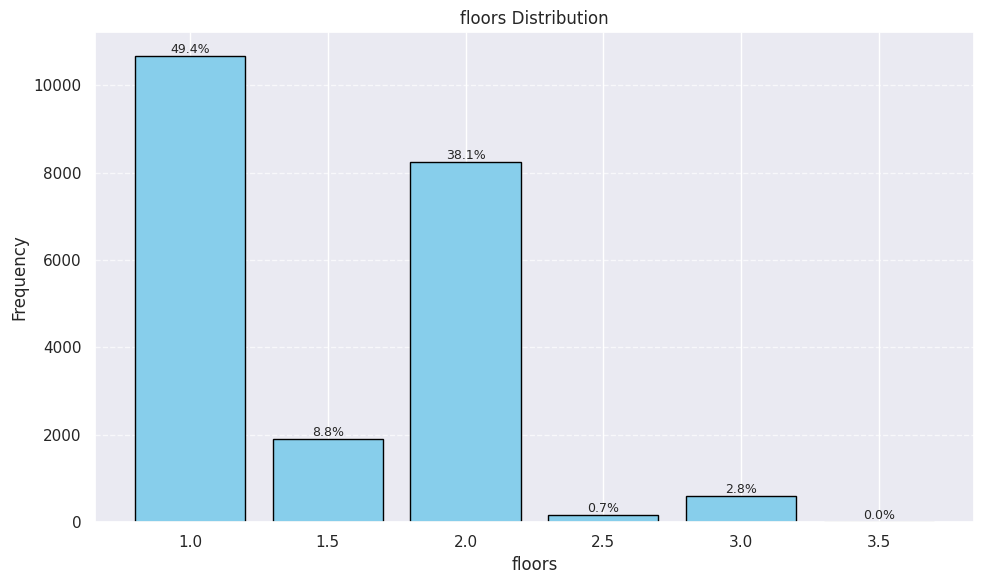

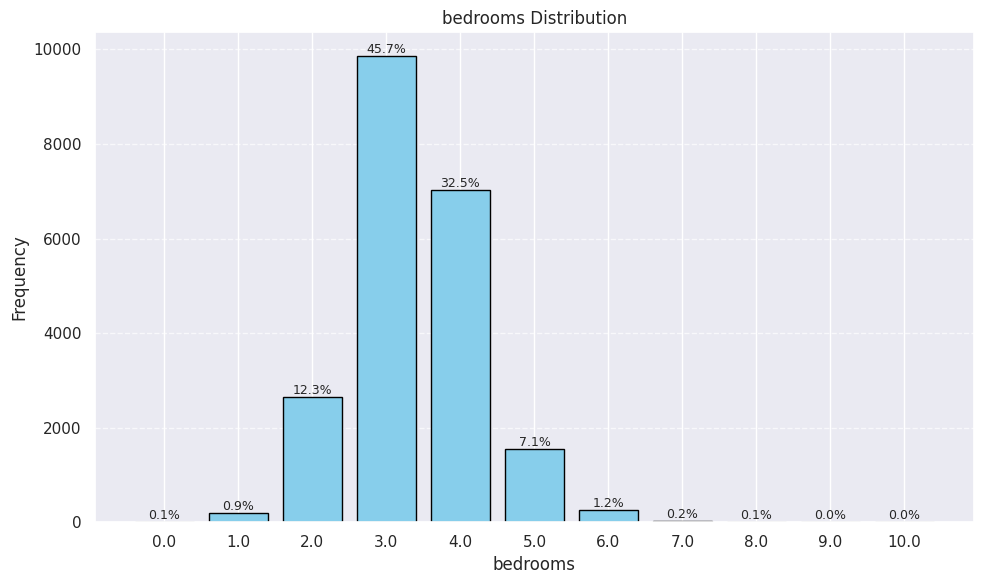

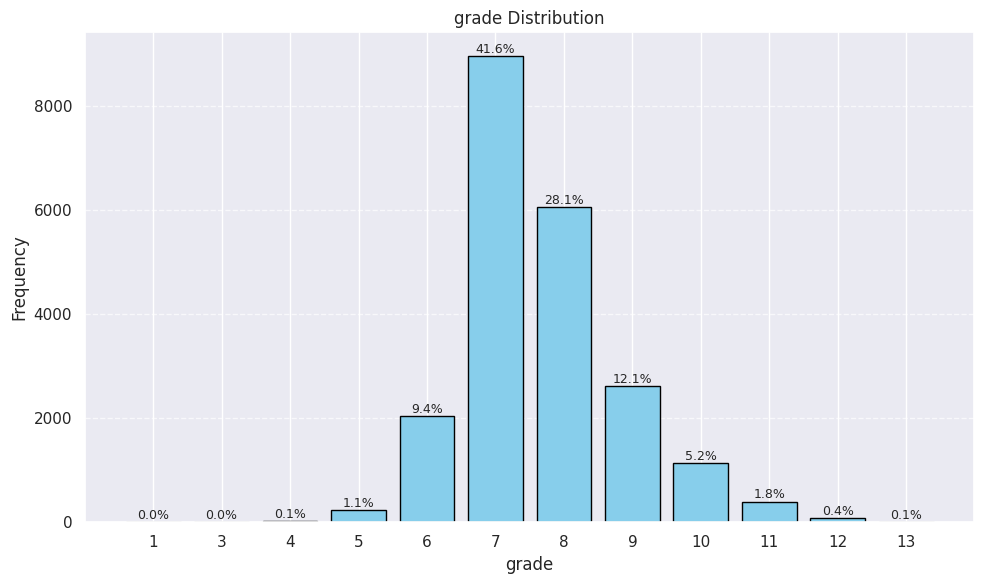

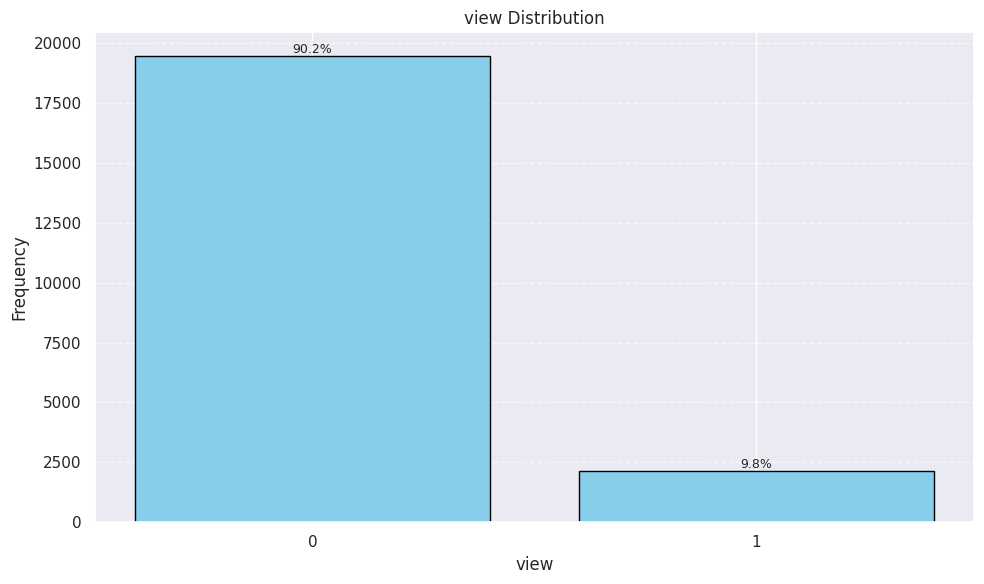

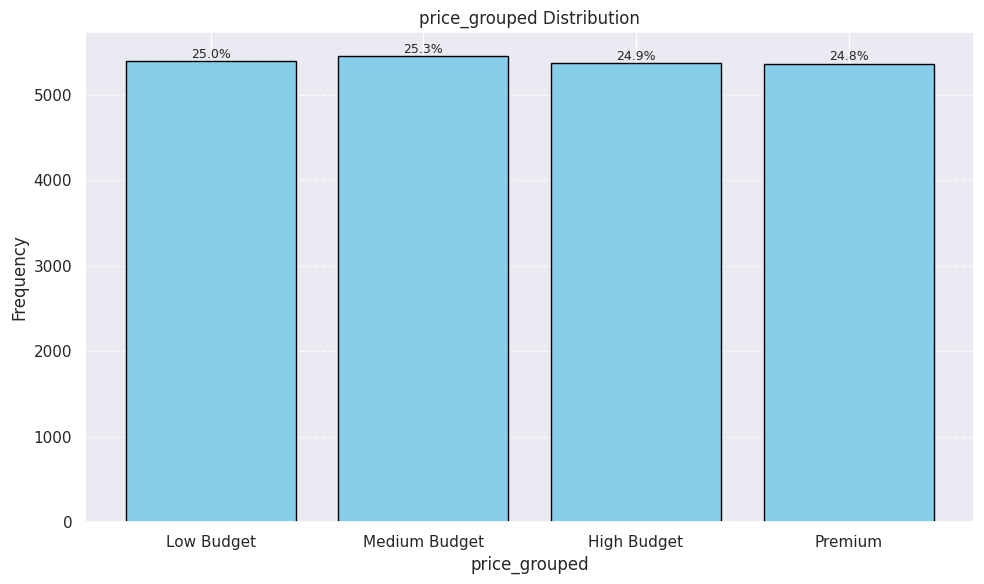

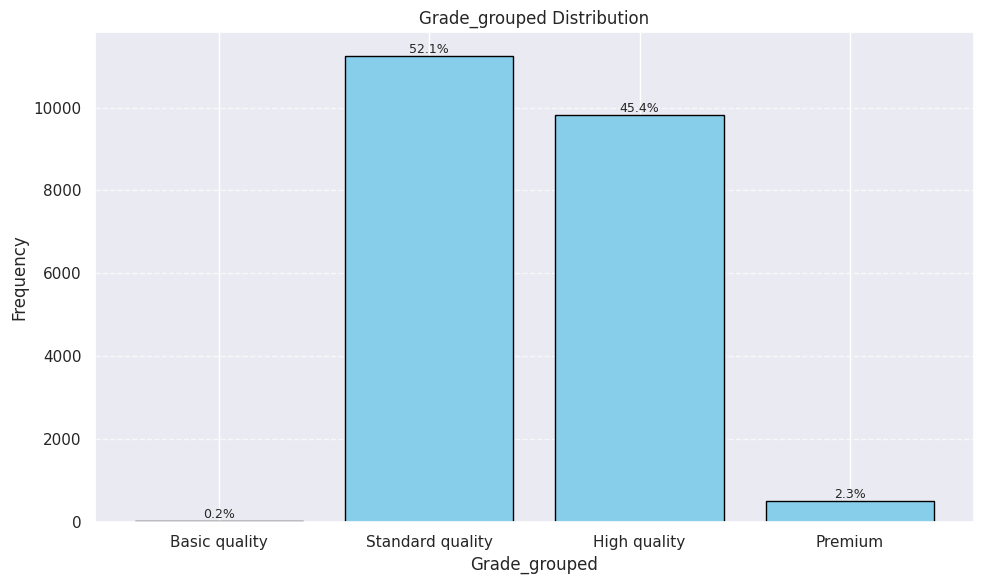

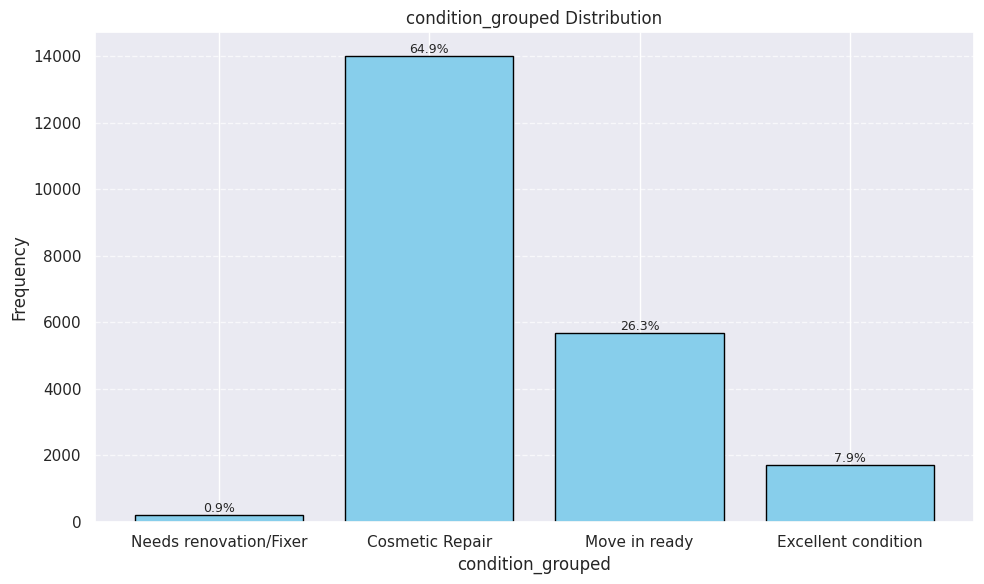

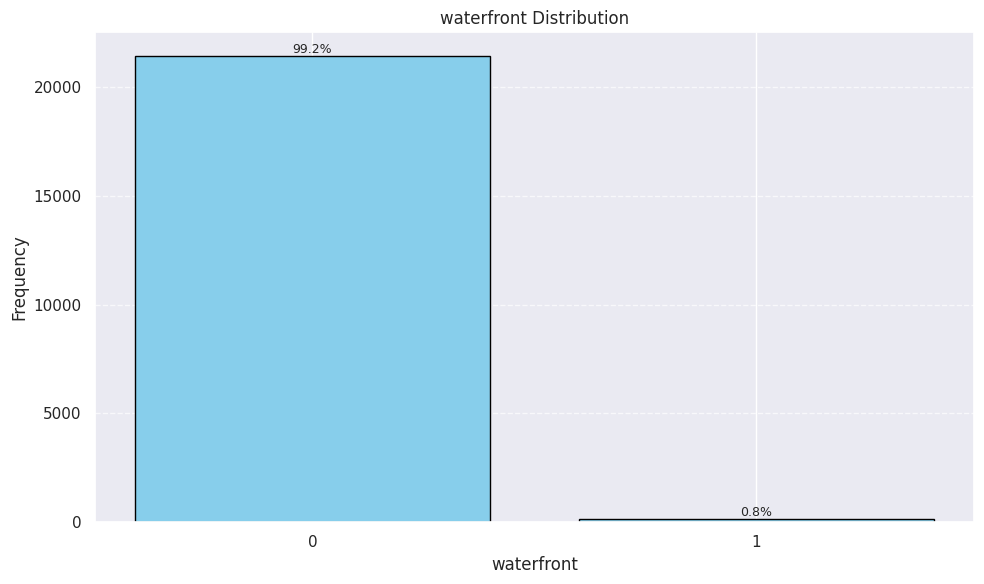

In [166]:
Measures_of_Distribution_list = ['floors', 'bedrooms', 'grade', 'view', 'price_grouped', 'Grade_grouped', 'condition_grouped', 'waterfront']

for column in Measures_of_Distribution_list:
    value_counts = housing_sales_df_cleaned[column].value_counts().sort_index()
    percentages = value_counts / value_counts.sum() * 100

    x_positions = range(len(value_counts))

    plt.figure(figsize=(10, 6))
    plt.bar(value_counts.index.astype(str), value_counts.values, color='skyblue', edgecolor='black')


    for i, pct in enumerate(percentages.values):
        plt.text(i, value_counts.values[i] + 1, f"{pct:.1f}%", ha='center', va='bottom', fontsize=9)

    plt.xticks(ticks=x_positions, labels=value_counts.index.astype(str))

    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


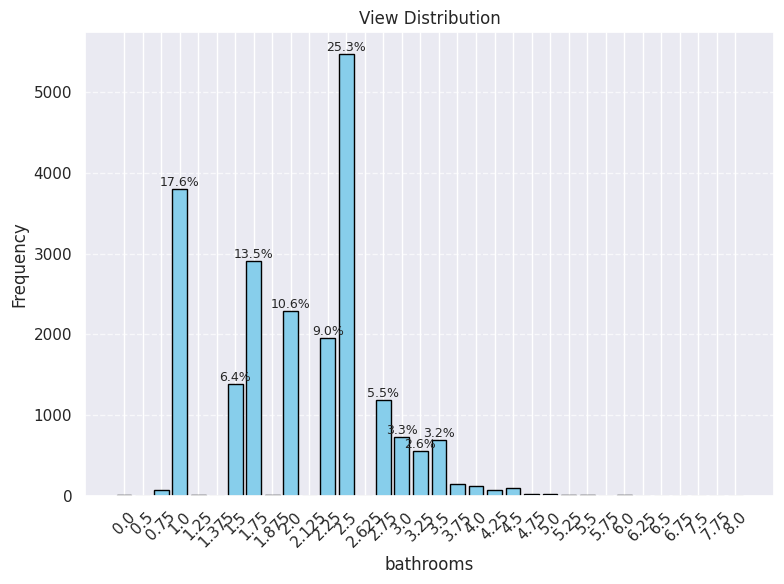

In [167]:
value_counts = housing_sales_df_cleaned['bathrooms'].value_counts().sort_index()
percentages = value_counts / value_counts.sum() * 100

plt.figure(figsize=(8, 6))
plt.bar(value_counts.index.astype(str), value_counts.values, color='skyblue', edgecolor='black')

for i, pct in enumerate(percentages.values):
    if pct > 1:
        plt.text(i, value_counts.values[i] + 1, f"{pct:.1f}%", ha='center', va='bottom', fontsize=9)

plt.title("View Distribution")
plt.xlabel("bathrooms")
plt.ylabel("Frequency")
plt.xticks(rotation=45)  # Optional: makes x-labels more readable
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


The histogram below reveals a highly right-skewed distribution of house prices, indicating that the majority of properties are priced on the lower end of the scale. Most houses are concentrated under $1 million, with a sharp decline in frequency as price increases. A long tail extends toward the right, suggesting the presence of high-priced outliers or luxury properties. This distribution is typical in real estate markets, where a few high-end properties significantly raise the maximum price range, but do not represent the norm. The skewness also implies that the mean price will be greater than the median, and standard statistical methods may need to account for this asymmetry in the data.

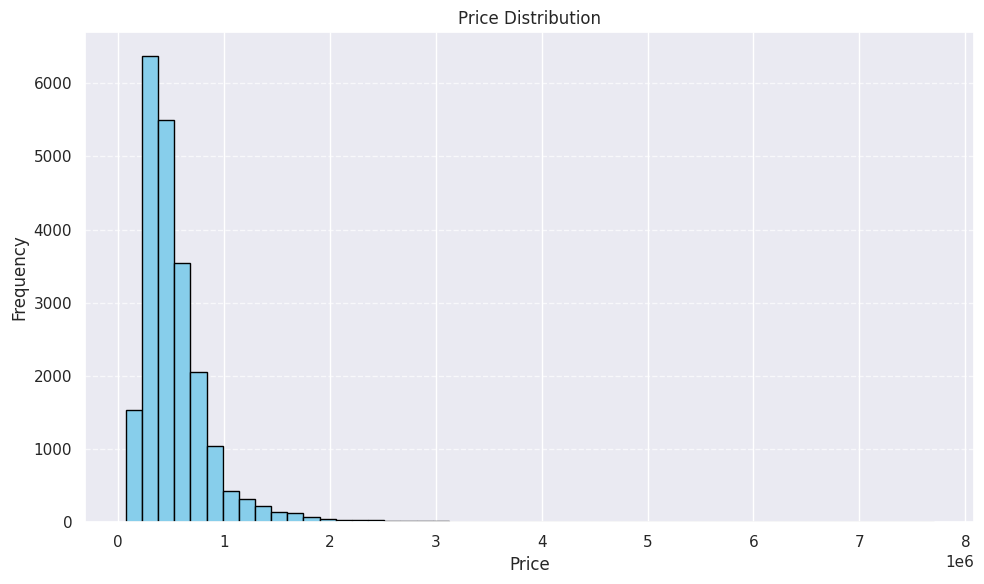

In [168]:
def plot_price_histogram(housing_sales_df_cleaned, column='price', bins=50, title='Price Distribution',xlabel='Price', ylabel='Frequency', grid=True):
  plt.figure(figsize=(10, 6))
  plt.hist(housing_sales_df_cleaned[column], bins=bins, color='skyblue', edgecolor='black')
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  if grid:
    plt.grid(axis='y', linestyle='--', alpha=0.7)

  plt.tight_layout()
  plt.show()

plot_price_histogram(housing_sales_df_cleaned)

The boxplot below illustrates the distribution of house prices across different property grades. A clear upward trend is observed, with higher grades generally associated with higher median and mean prices. For lower grades (1–5), prices remain relatively low and tightly clustered, while higher grades (10–13) exhibit a broader range and significantly higher price points. The presence of numerous outliers in the upper grades suggests that some luxury properties have prices far above the average for their grade. Additionally, the variability in price increases with grade, indicating that higher-grade homes not only cost more on average but also vary more widely in value. Overall, this visualization reinforces the positive relationship between property grade and market price, while also highlighting the growing disparity in pricing at the higher end of the scale.

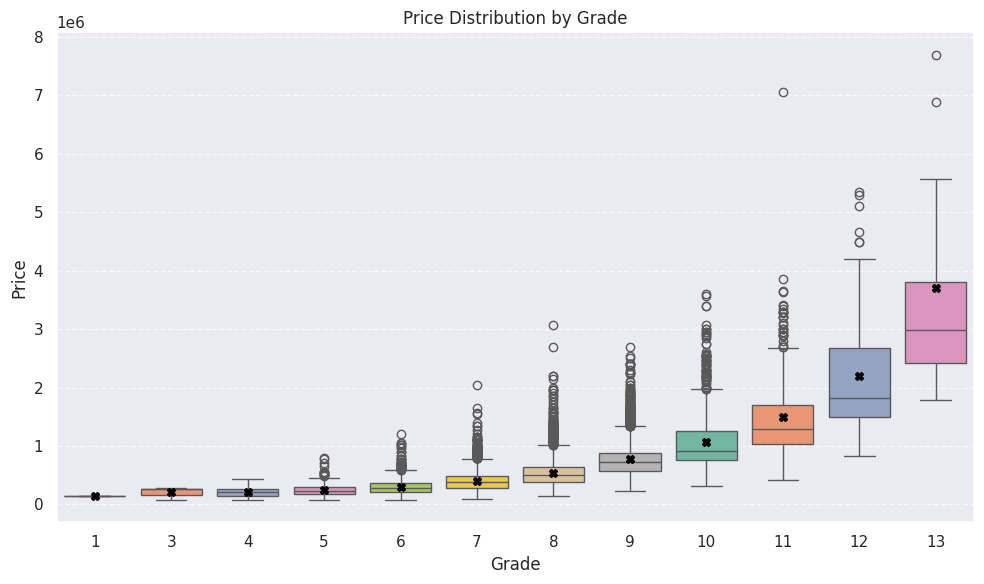

In [169]:
plt.figure(figsize=(10, 6))

sns.boxplot(
    data=housing_sales_df_cleaned,
    x='grade',
    y='price',
    hue=None,
    palette='Set2',
    showmeans=True,
    meanprops={"marker": "X", "markerfacecolor": "black", "markeredgecolor": "black"}
)

plt.title("Price Distribution by Grade")
plt.xlabel("Grade")
plt.ylabel("Price")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# **MEASURES OF CENTRALITY**

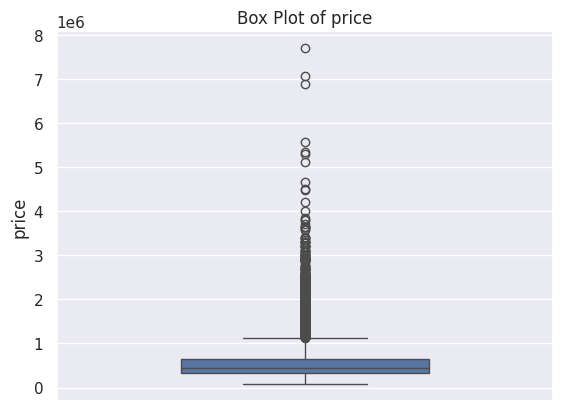

=== price ===
Mean: 540,019.33
Median: 450,000.00
Standard Deviation: 367,130.72
Min: 75,000.00
Max: 7,700,000.00
IQR: 323500.00
Skewness: 4.03
Interpretation: The distribution of 'price' is highly right-skewed (long right tail).



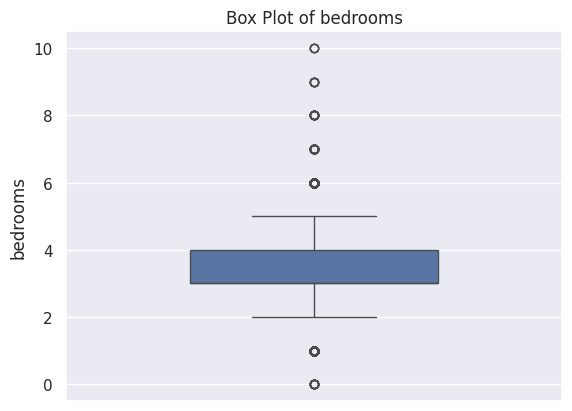

=== bedrooms ===
Mean: 3.37
Median: 3.00
Standard Deviation: 0.89
Min: 0.00
Max: 10.00
IQR: 1.00
Skewness: 0.48
Interpretation: The distribution of 'bedrooms' is approximately symmetric.



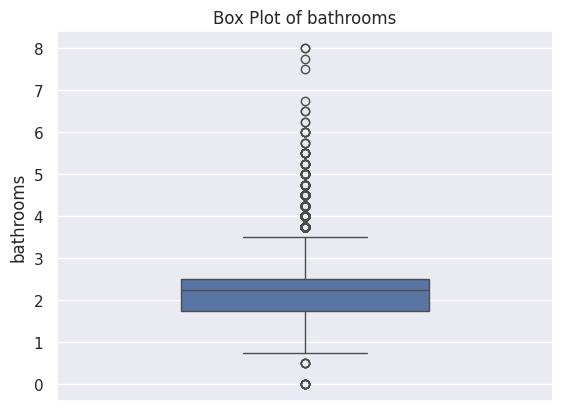

=== bathrooms ===
Mean: 2.11
Median: 2.25
Standard Deviation: 0.76
Min: 0.00
Max: 8.00
IQR: 0.75
Skewness: 0.49
Interpretation: The distribution of 'bathrooms' is approximately symmetric.



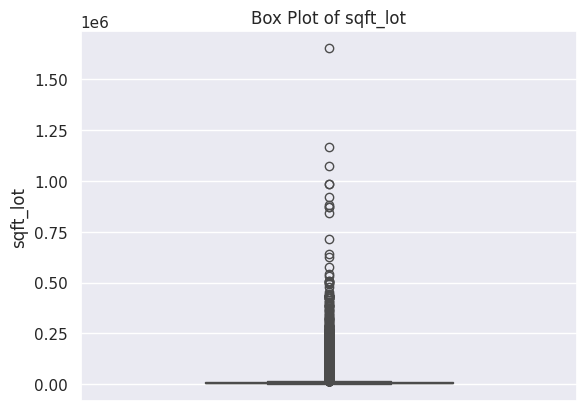

=== sqft_lot ===
Mean: 14,825.49
Median: 7,620.00
Standard Deviation: 40,526.54
Min: 520.00
Max: 1,651,359.00
IQR: 5289.25
Skewness: 13.18
Interpretation: The distribution of 'sqft_lot' is highly right-skewed (long right tail).



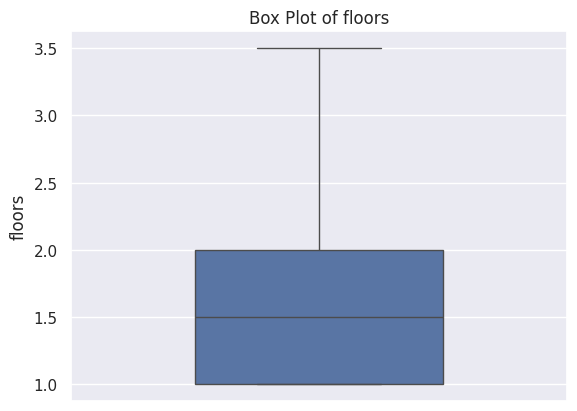

=== floors ===
Mean: 1.49
Median: 1.50
Standard Deviation: 0.54
Min: 1.00
Max: 3.50
IQR: 1.00
Skewness: 0.62
Interpretation: The distribution of 'floors' is moderately right-skewed.



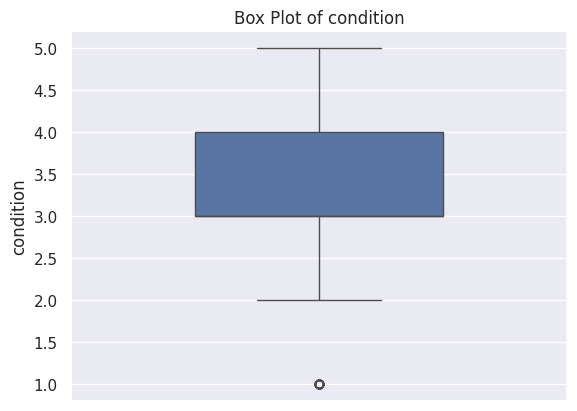

=== condition ===
Mean: 3.41
Median: 3.00
Standard Deviation: 0.65
Min: 1.00
Max: 5.00
IQR: 1.00
Skewness: 1.03
Interpretation: The distribution of 'condition' is highly right-skewed (long right tail).



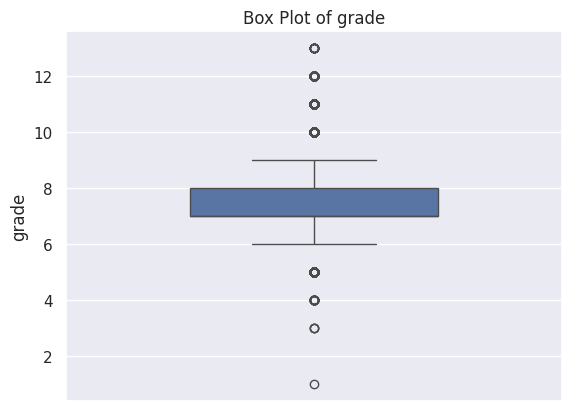

=== grade ===
Mean: 7.66
Median: 7.00
Standard Deviation: 1.18
Min: 1.00
Max: 13.00
IQR: 1.00
Skewness: 0.77
Interpretation: The distribution of 'grade' is moderately right-skewed.



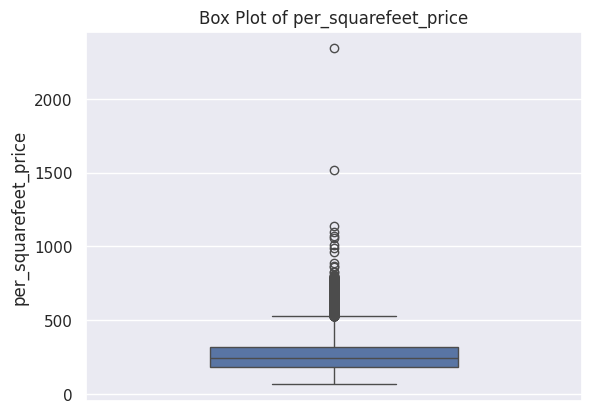

=== per_squarefeet_price ===
Mean: 265.10
Median: 244.76
Standard Deviation: 114.02
Min: 64.74
Max: 2,341.84
IQR: 137.98
Skewness: 1.64
Interpretation: The distribution of 'per_squarefeet_price' is highly right-skewed (long right tail).



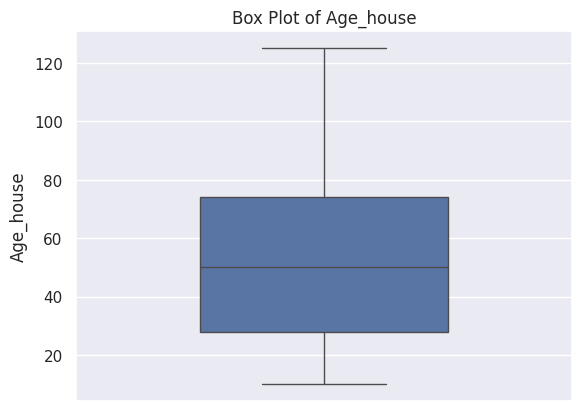

=== Age_house ===
Mean: 53.98
Median: 50.00
Standard Deviation: 29.36
Min: 10.00
Max: 125.00
IQR: 46.00
Skewness: 0.47
Interpretation: The distribution of 'Age_house' is approximately symmetric.



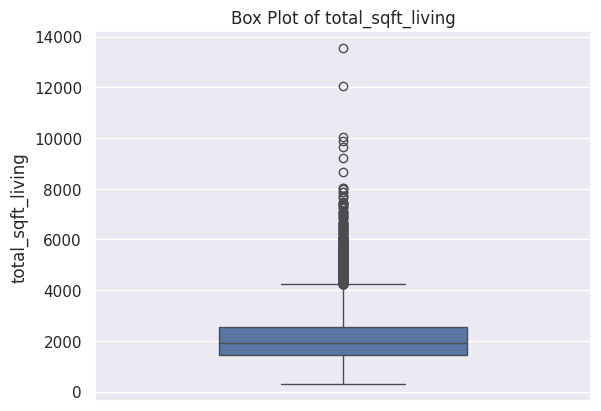

=== total_sqft_living ===
Mean: 2,079.85
Median: 1,910.00
Standard Deviation: 918.54
Min: 290.00
Max: 13,540.00
IQR: 1125.75
Skewness: 1.47
Interpretation: The distribution of 'total_sqft_living' is highly right-skewed (long right tail).



In [170]:
Measures_of_centrality_list = ['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'condition', 'grade', 'per_squarefeet_price', 'Age_house', 'total_sqft_living']

for var in Measures_of_centrality_list:
    plt.figure()
    sns.boxplot(y=housing_sales_df_cleaned[var], width=0.5)
    plt.title(f'Box Plot of {var}')
    plt.ylabel(var)
    plt.show()

    data = housing_sales_df_cleaned[var]
    skew_val = data.skew()

    print(f"=== {var} ===")
    print(f"Mean: {data.mean():,.2f}")
    print(f"Median: {data.median():,.2f}")
    print(f"Standard Deviation: {data.std():,.2f}")
    print(f"Min: {data.min():,.2f}")
    print(f"Max: {data.max():,.2f}")
    print(f"IQR: {(data.quantile(0.75) - data.quantile(0.25)):.2f}")
    print(f"Skewness: {skew_val:.2f}")

    if skew_val > 1:
        interpretation = "highly right-skewed (long right tail)"
    elif 0.5 < skew_val <= 1:
        interpretation = "moderately right-skewed"
    elif -0.5 <= skew_val <= 0.5:
        interpretation = "approximately symmetric"
    elif -1 <= skew_val < -0.5:
        interpretation = "moderately left-skewed"
    else:
        interpretation = "highly left-skewed (long left tail)"

    print(f"Interpretation: The distribution of '{var}' is {interpretation}.")
    print()


--------

<br>


# **CORRELATION BETWEEN VARIABLES**


We can classify variables of dataset as dependent and independent variables

**Dependent Variable** -Price is the target variable that we have to predict

**Independent Variable**


*   Structural charcteristics- bedrooms,sqft_lot,floors,sqft_above
*   By quality and amenities-Conditions,Grade,View,Waterfront
*   Age and Renovation-yr_built,yr_renovated
*   Location-Zipcode,lat,long
*   Newly constructed features-per_squarefoot_price,Age_house,total_sqft_living


Selecting the numerical columns to find correlation between the variables

In [171]:
#selecing all numerical columns into numerical_columns
numerical_column=['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'yr_built', 'yr_renovated',
                   'floors', 'waterfront', 'view', 'condition', 'grade','lat', 'long',
                  'per_squarefeet_price', 'Age_house', 'total_sqft_living']

In [172]:
#finding correlation between variables
correlation=housing_sales_df_cleaned[numerical_column].corr()
#display output correlation
correlation

,price,bedrooms,bathrooms,sqft_lot,yr_built,yr_renovated,floors,waterfront,view,condition,grade,lat,long,per_squarefeet_price,Age_house,total_sqft_living
price,1.00,0.31,0.52,0.09,0.05,0.13,0.26,0.27,0.36,0.04,0.67,0.31,0.02,0.58,-0.05,0.70
bedrooms,0.31,1.00,0.53,0.03,0.17,0.02,0.19,-0.01,0.08,0.02,0.37,-0.01,0.14,-0.20,-0.17,0.58
bathrooms,0.52,0.53,1.00,0.08,0.50,0.05,0.49,0.07,0.17,-0.12,0.65,0.03,0.22,-0.06,-0.50,0.75
sqft_lot,0.09,0.03,0.08,1.00,0.05,0.01,-0.01,0.02,0.07,-0.01,0.11,-0.09,0.22,-0.02,-0.05,0.17
yr_built,0.05,0.17,0.50,0.05,1.00,-0.22,0.49,-0.03,-0.06,-0.36,0.45,-0.15,0.41,-0.27,-1.00,0.32
yr_renovated,0.13,0.02,0.05,0.01,-0.22,1.00,0.01,0.09,0.10,-0.06,0.01,0.03,-0.07,0.10,0.22,0.06
floors,0.26,0.19,0.49,-0.01,0.49,0.01,1.00,0.02,0.02,-0.26,0.46,0.05,0.13,0.02,-0.49,0.35
waterfront,0.27,-0.01,0.07,0.02,-0.03,0.09,0.02,1.00,0.26,0.02,0.08,-0.01,-0.04,0.19,0.03,0.10
view,0.36,0.08,0.17,0.07,-0.06,0.10,0.02,0.26,1.00,0.05,0.24,0.01,-0.09,0.21,0.06,0.27
condition,0.04,0.02,-0.12,-0.01,-0.36,-0.06,-0.26,0.02,0.05,1.00,-0.14,-0.02,-0.11,0.10,0.36,-0.06


Using heat map to understand correlation between different variables


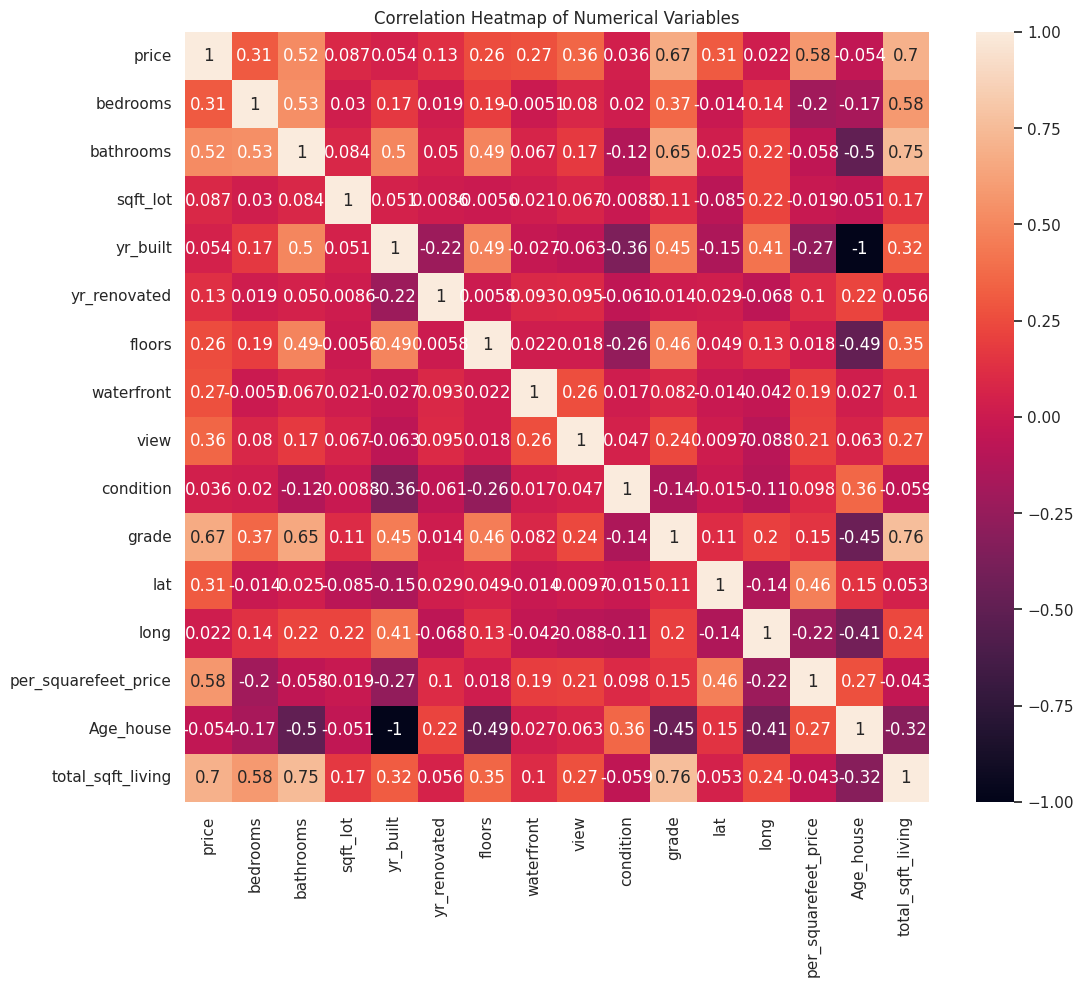

In [173]:
#ploting heatmap for correlation
plt.figure(figsize=(12, 10))
sns.heatmap(correlation,annot=True)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

Fom the above heatmap,we get a visual representation of how different housing variables relate to price and to each other.Each cell shows the correlation between two variables.The color represents the strength and direction of linear relationship between two variables.Dark purpule and Black colour indicates strong negative correlation between variabes.Dark shade of red and orange indicate strong positive correlation ,and light shade of white colour indicates week to zero correlation between variables.

Key Findings:

*   Total living area: The strongest positive correlation confirms that larger homes have higher prices(0.7).As the living area increases,price also increases.
*  Grade: Construction quality is influential as size, with premium-grade homes fetching premium prices.This we can understand from strong positive correlation  of 0.67 between grade and price.
*  Bathrooms: More bathrooms positively correlate with price (0.52).
*  Per-square-foot price: This newly constructed feature is useful for comparing properties across sizes.It shows a positive correlation of 0.58 with price.
*   Waterfront and view:These location based amenities add moderate but meaningful Correlations value to home price, with views(0.36) being slightly more impactful than waterfront access(0.27).
*   Bedrooms (0.31): While relevant, bedroom count matters less than total space or quality, aligning with the pairplot insights.

*   Condition: Maintenance status shows a very weak linear relationship with price  (0.04), suggesting buyers prioritize quality(grade) over condition.
*   Year built: This newly constructed feature shows negative correlation (-0.05) with price, suggesting older homes that are well maintained in desirable areas may hold value well than age.


*   Latitude and Longitude: Prices shows higher in northern areas(latitude-0.31), possibly due to weather conditions or premium neighborhoods or good amenities, or a school district.While Longitude ,the east -west parts has a weak correlation (0.02) with price as it may not be a desirable place due to underdevelopment.


**Highly correlated variables with price**

In [174]:
#let us group the highly correlated variables which has meaningful impact on house price
highly_correlated=['price','bedrooms','bathrooms','total_sqft_living','per_squarefeet_price','grade']
highly_correlated

['price',
 'bedrooms',
 'bathrooms',
 'total_sqft_living',
 'per_squarefeet_price',
 'grade']

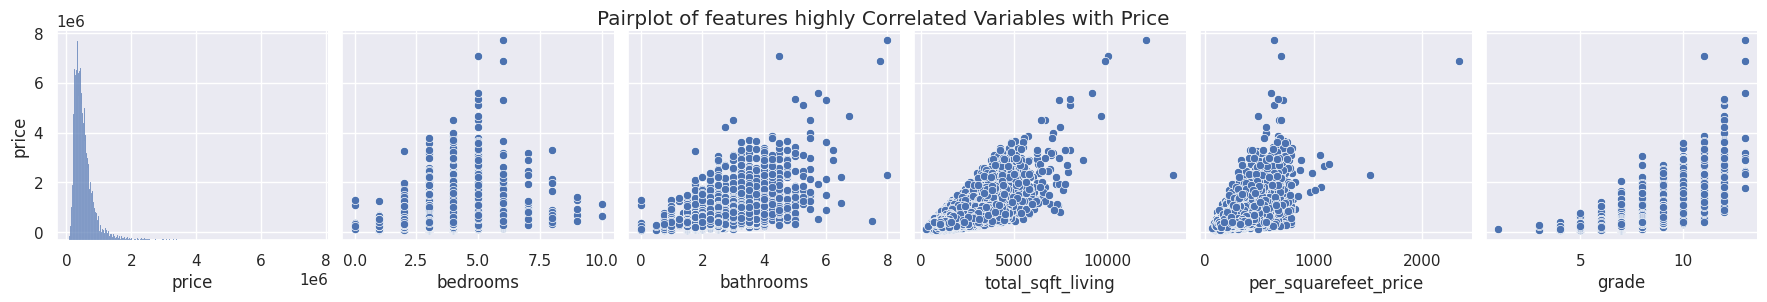

In [175]:
#plotting the pairplots of highly correlated variables with price
sns.set()
#sns.pairplot(housing_sales_df_cleaned[highly_correlated],height = 2)
sns.pairplot(housing_sales_df_cleaned,x_vars=highly_correlated, y_vars="price", kind="scatter", height=3)
#plot title
plt.suptitle('Pairplot of features highly Correlated Variables with Price')
plt.show()

The above pair plot shows some of the highly correlated and relevent independent variables for the house price.


*   price distribution-The histogram for price shows right-skewed, indicating that most homes are clustered in the lower to mid price ranges under 1 million dollars with few highly priced homes.
*   Impact of bedrooms and bathrooms-There is a positive correlation between number of bedrooms and bathrooms with price.Houses with more bedroom and bathroom shows higher prices.However, the scatter plots shows diminishing price with 5+ bedrooms suggesting other factors (location, quality) also plays a strong role in price.
*   Grade(quality)-shows exponential relationship with price. Most homes fall into the mid-range (grades 7–9), with fewer at the extremes (low-grade or luxury).High quality built homes with grade 10 or more has high price.This highlights that buyers pay a premium for superior quality construction, even if other features (e.g., bedrooms) are comparable.
*   Total sqft living-A stong correlation can be found in scatter plot between sqft living and house price.More the living area ,more is the price of house.Larger homes above 3,000 sqft shows a steeper price increase, confirming that square footage is a dominant pricing factor.


*   Per square feet price-The relationship is nonlinear, with higher variability in luxury homes (e.g., some small but expensive properties skew the trend).

This suggests that premium locations or unique features (e.g., waterfronts) can inflate per-square-foot costs beyond size alone.






Conclusions: Size (total sqft) and quality (grade) are the strongest factors effecting home price, while bedrooms/bathrooms have a secondary influence only.

Per-square-foot price is useful for comparing value across homes of different sized homes but can vary significantly based on location and available amenities.

The pairplot shows that while larger homes tend to cost more, high grade construction or luxuary features can effect the size price relationship.

**SHESHMA'S CODE**

# **EXPLORATORY DATA ANALYSIS**

Exploratory data analysis is done to visually analyse housing data to understand hidden pattern in pricing based on different features.

## **Price Trends and Buyer Preferences**

**Home Buyers Preference by Price Category**

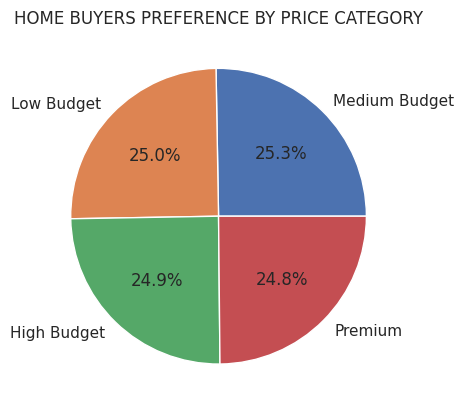

In [176]:
#pie plot for percentage breakdown of home price group categories
plt.pie(housing_sales_df_cleaned['price_grouped'].value_counts(),labels=housing_sales_df_cleaned['price_grouped'].value_counts().index,autopct='%1.1f%%')
plt.title('HOME BUYERS PREFERENCE BY PRICE CATEGORY')
plt.show()

The distribution of homes in to four price ranges-low budget,Medium budget,and premium is shown in the pie chart gives important information about market segementation.Most of the house are in medium(25.3%)and low budget(25%) suggesting that most buyers are focussed on mid range affordability.While high budget(24.9%) and premium(24.8%) also shows close preferences.This nearly equal distribution suggest a balanced market with demand in all price ranges.The premium portion shows the presence of luxuy buyers.This distribution is important for a realestate stakeholder to understand the customers and their preferences.

**Peak Buying Season**

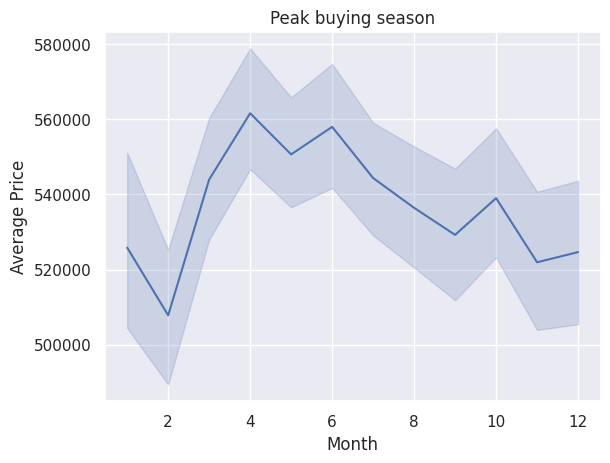

In [177]:
#peak buying season
#taking dates column to extract month
housing_sales_df_cleaned['month'] = housing_sales_df_cleaned['date'].dt.month
#plotting a line graph to show how price change throughout year
sns.lineplot(x='month', y='price',data=housing_sales_df_cleaned)
#Giving plot titles and label axis
plt.title('Peak buying season')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()



The line graph shows home prices by month, indicating seasonal trends in the housing market. Prices peak during certain months, showing periods of high demand, such as spring or early summer, when families prefer to relocate before the new school year. On the other hand, prices dip during winter months,indicating lower buyer activity in festival season.Average home prices peak in April at approximately 560k dollars  and dip in winter to just under 500k dollars . The range between the highest and lowest monthly averages suggests seasonal price variation of nearly 60k dollars,showing cyclical trends in buyer behavior.

This pattern is important for sellers timing to list their listings to maximize profits, and for buyers looking for bargains during off-peak seasons. The line plot also shows cultural factors influencing buying behavior, such as holidays or weather conditions. Understanding these trends allows agents/broker to strategize listings, promotions, and purchases for optimal outcomes.Real estate developers and brokers can also plan inventory releases and promotional campaigns around these cycles.

## **Location-Based Insights**

**Price per Square Foot by Zip Code**

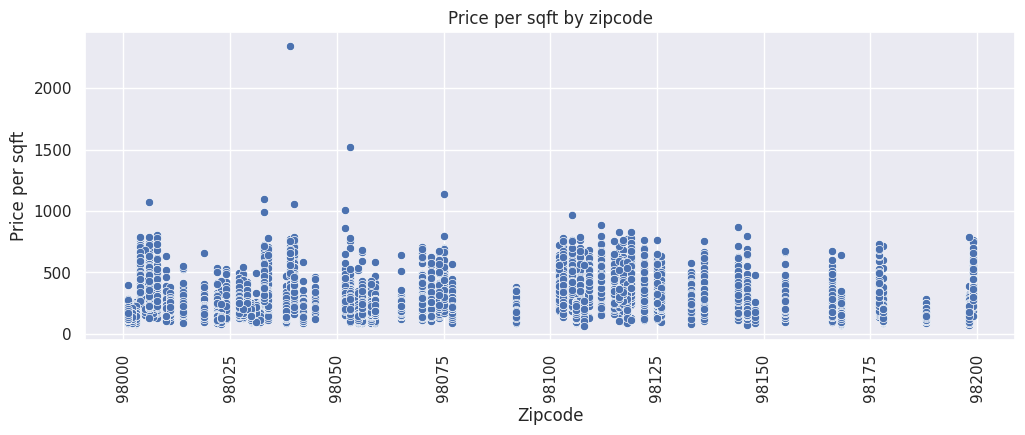

In [178]:
#price per sqft by zipcode
#plotting the scatterplot
plt.figure(figsize=(12, 4))
sns.scatterplot(x='zipcode',y='per_squarefeet_price',data=housing_sales_df_cleaned)
#Giving titles and labels
plt.xlabel('Zipcode')
plt.ylabel('Price per sqft')
plt.title('Price per sqft by zipcode')
plt.xticks(rotation=90)
plt.show()

The scatter plot displays the price per square foot across different zip codes. Certain zip codes such as 98039, shows higher prices per square foot, indicating premium locations, likely due to factors like proximity to urban centers, waterfront access, or amenities. In contrast, other zip codes show lower values, suggesting more affordable or less desirable areas. This visualization tells the importance of location in determining property value. The outliers in the plot may represent niche markets or areas with unique characteristics, such as scenic views or luxuary neighborhoods. Understanding these patterns can guide buyers, sellers, and developers in making informed decisions about where to invest or purchase property.

**Home Price Distribution by Geographic Location**

Text(0, 0.5, 'Latitude')

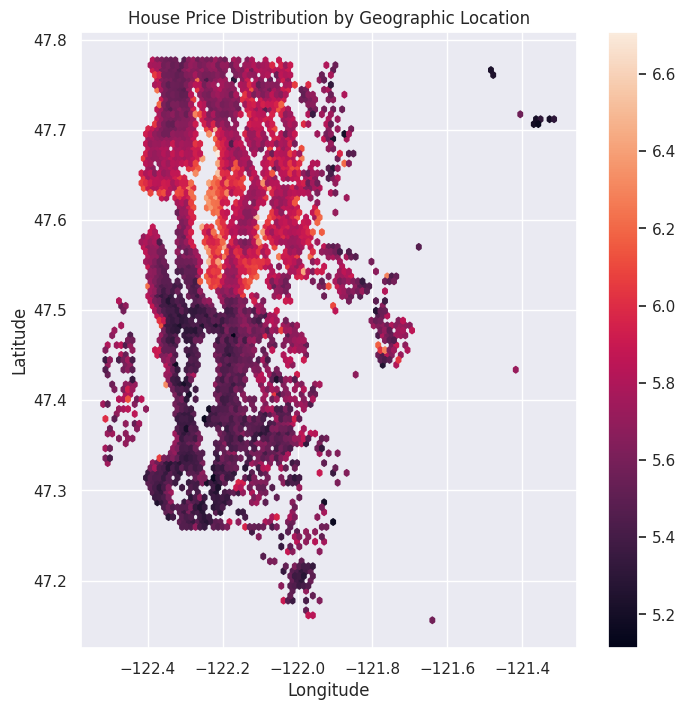

In [179]:
#Density visualisation by latitide and longitude
plt.figure(figsize=(8, 8))
#plotting hexbin plot
scatter=plt.hexbin(x=housing_sales_df_cleaned['long'],y=housing_sales_df_cleaned['lat'],C=np.log10(housing_sales_df_cleaned['price']))
bar = plt.colorbar(scatter)
#labelling
plt.title('House Price Distribution by Geographic Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

The hexbin plot visualizes home prices based on latitude and longitude, with color intensity representing different price levels.The color intensity shows right-skewed price distribution, with most homes priced below the mean and long tail for high-priced properties. The plot reveals clusters of high-priced homes in specific geographic areas, likely  neighborhoods or regions with high house demand. Conversely, areas with lighter colors indicate lower-priced properties, which may be located in less prefered or developing regions. This plot highlights the strong influence of location on housing prices, with areas often having premium prices. The plot also shows potential hotspots for investment, as well as regions where affordability may be higher.

## **Property Features and Condition**

**Average Price by Condition and Grade**

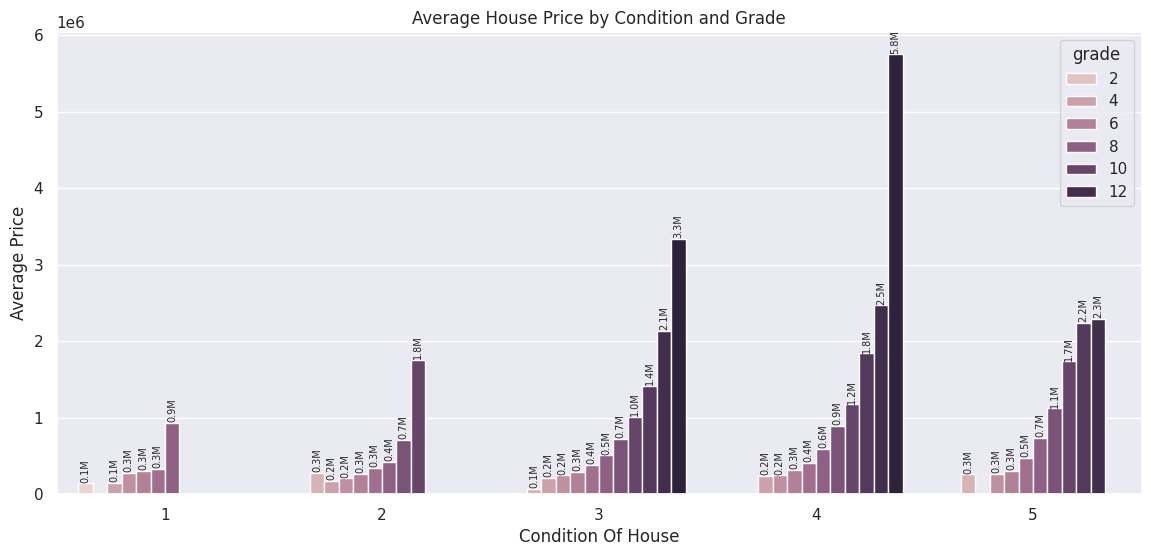

In [180]:
#impact of price on conditions and grade of house
#we will use our newly constructed feature price_grade_condition to analyse this.
#converting multi index to column by resting index to get only mean of price
price_grade_mean = price_grade_condition.reset_index()
#plot a grouped barplot for average price by condition and grade
plt.figure(figsize=(14, 6))
cg=sns.barplot(x='condition',y='mean',hue='grade',data=price_grade_mean)
#add labels on bars by defining function
def add_labels(cg):
    for bar in cg.patches:
        height = bar.get_height()
        if height > 0:
            cg.text(bar.get_x() + bar.get_width()/2, height + 10000, f'{height/1e6:.1f}M',
                    ha='center', va='bottom', fontsize=7, rotation=90)
#applying label on bars
add_labels(cg)
#plot title
plt.title('Average House Price by Condition and Grade')
#giving labels to x and y
plt.xlabel('Condition Of House')
plt.ylabel('Average Price')
plt.show()

The above bar chart shows how a house's price is affected by two main factors: its grade (how well it was built) and its condition (how well it is maintained).

Houses with higher grades like 10, 11, 12, or 13 meaning they have better design, materials, and finishes are much more expensive, no matter their condition. For example, a grade 12 house in the best condition (5/5) sells for over 2.4 million dollars, while the homes with grade 13 can go as high as 5.75 million dollars. On the other hand, houses with average grades (5, 6, or 7) usually cost between 250k dollars and 500k dollars, depending on how well they’ve been maintained.

Condition makes a bigger difference for mid-range homes. A grade 7 house in very good condition (5) might sell for 479k dollars, but if it’s a bit run-down condition (2 or 3),price could drop to 334k–$385k dollars. This means that even a well-built house loses value if it is not maintained properly. But if a mid-grade home is kept in great shape, it can actually be worth more than a higher-grade home that’s been neglected.

For low-grade homes (grades 1–3), condition doesn’t change much and are cheap (under $300,000) even if it is in good shape.

Grade (build quality) is the biggest factor in price.

The most priced homes are both high-grade and in great condition.
We can conclude that, if you want the best return, focus on high-grade homes and keep them well maintained.


**Impact of House Renovation on Price**

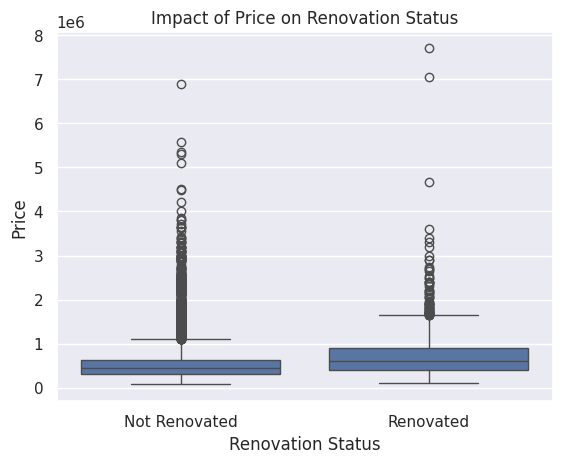

In [181]:
#box plot of impact of price when house is renovated and not renovated
#We can create a categorical column 'renovation_status' to see if house is renovated or not
housing_sales_df_cleaned['renovation_status'] = housing_sales_df_cleaned['yr_renovated'].apply(lambda x: 'Renovated' if x > 0 else 'Not Renovated')
#plot a box plot to see price distribution by renovation status
sns.boxplot(x='renovation_status', y='price', data=housing_sales_df_cleaned)
#Adding title and labels
plt.title('Impact of Price on Renovation Status')
plt.xlabel('Renovation Status')
plt.ylabel('Price')
plt.show()

The above box plot compares housr price between renovated and non renovated homes.


*   Renovated homes-The median price of renovated homes is greater ( approx 760 k dollars) than non renovated homes(approx 520 K dollars).The wider inter quartile range suggest more variability in renovated home price,may be due to location or age of home.Some renovated houses show huge price outliers beyound market range
*   Non-Renovated homes-Non renovated homes show cluster around a lower median price with a tighter inter quartile range.There is few high value outliers.

The boxplot shows a strong market preference for renovated homes.
The average $240,000 price gap shows buyers pay extra for move-in-ready homes that are renovated regardless of age.


**Impact of Waterfront and Views on Home Prices Across Conditions**


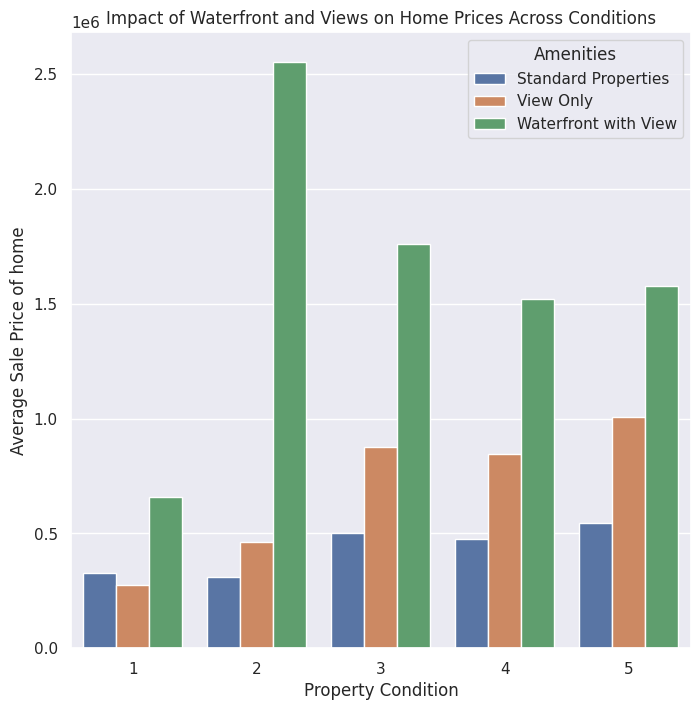

In [182]:
#Calculate average prices by different amenities
price_view_waterfront_cond = housing_sales_df_cleaned.groupby(['waterfront', 'view', 'condition'])['price'].mean().reset_index()

#Create descriptive feature labels
price_view_waterfront_cond['property_features'] = np.select([(price_view_waterfront_cond['waterfront'] == 1) & (price_view_waterfront_cond['view'] == 1),
        (price_view_waterfront_cond['waterfront'] == 1),(price_view_waterfront_cond['view'] == 1)],['Waterfront with View','Waterfront Only','View Only'],default='Standard Properties')
plt.figure(figsize=(8, 8))
#plot grouped bar plot
feature_plot = sns.barplot(x='condition',y='price',hue='property_features',data=price_view_waterfront_cond,order=np.sort(price_view_waterfront_cond['condition'].unique()),hue_order=['Standard Properties', 'View Only', 'Waterfront with View'])
feature_plot.set_title('Impact of Waterfront and Views on Home Prices Across Conditions')
feature_plot.set_xlabel('Property Condition')
feature_plot.set_ylabel('Average Sale Price of home')
plt.legend(title='Amenities')
plt.show()

The grouped bar plot shows how waterfront access and views influence home prices across different property conditions. The results show that homes with both waterfront and views sell at the highest prices, followed by waterfront-only properties. Even in lower-condition categories, these features greatly increase price value of homes.On the other hand, standard properties without these amenities are priced lower, even in excellent condition.This emphasizes how much value buyers place on features that are specific to a given location, such as scenic views and waterfronts.The plot also shows that the difference in price between standard and premium-feature homes increases with better condition, indicating that the best returns are obtained when premium features and excellent condition are combined. For developers and sellers who prioritize making improvements to their properties, this information is essential.

# **Price Patterns by Age of house**

**Sales Volume by Age of House**

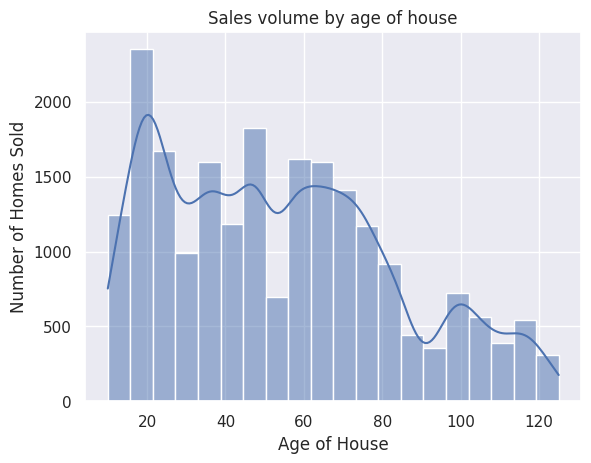

In [183]:
#histogram plot for Sales volume by age of house
sns.histplot(x='Age_house',data=housing_sales_df_cleaned,bins=20,kde=True)
plt.title('Sales volume by age of house')
plt.xlabel('Age of House')
plt.ylabel('Number of Homes Sold')
plt.show()

The histogram shows the distribution of homes sold by age of the property with kernel density estimate.The plot shows a bimodal distribution, with peaks for both newer homes(ged 10 to 30 year) and mid ages homes indicating new properties dominate the market.The distribution is right-skewed, with few sales as house ages.This suggests a market where buyers are interested in modern properties and older homes(well maintained or renovated or scenic views).

# **Data Analytics**

**Determining Supervised vs. Unsupervised Learning**

The first step in analyzing whether we need supervised or unsupervised learning is to understand the goal of studying the dataset. In this case, we aim to create a predictive model to forecast housing prices based on other features in our dataset. When examining the housing dataset, the price column serves as our target variable, which is the value we want to predict. Since the dataset contains historical price information for each property, this indicates that we should use supervised learning.


Furthermore, the price values are numeric (continuous) rather than categorical, confirming that this is a regression problem rather than a classification issue.

**Identifying Variables**

After confirming that supervised learning is appropriate, we can separate the variables into dependent (target) and independent (features)variables.


**Dependent Variable (Target)**


The 'price' column is our dependent variable—the outcome we want to predict.

**Independent Variables (Features)**


*   sqft_living, lat, long, per_squarefeet_price(continuous)
*   bedrooms, bathrooms, floors, Age_house(Discrete)
*   waterfront (binary), grade_grouped (ordinal), zipcode (nominal)







**Model Recommendation Logic**

Problem Type: Supervised learning (target variable price is numeric).

Approach We can built multiple model to predict house prices using a few key features.First , we split the data into training and testing sets,and train each model on the training set, and checked how well it did on the test set.Then we can compare the metrics(RMSE,MAE,R²) of each model to see which is the best performing model.Some of the model we will be using are,

Linear Regression:Simple, baseline. Shows feature importance and direction.But this model assumes linear relationships.

Ridge Regression:Improved linear model to handle multicollinearity.There are features in our dataset that are highly corelated to price,this model prevent overfitting.

Random Forest:Handles mixed data types, non-linear patterns, and outliers.

Gradient Boosting (XGBoost):Handles mixed data types in our dataset.

In [184]:
#import libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression


In [185]:
#Make a copy of original data in df
df=housing_sales_df_cleaned.copy()
#view columns
df.columns


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'per_squarefeet_price', 'Age_house',
       'total_sqft_living', 'price_grouped', 'Grade_grouped',
       'condition_grouped', 'month', 'renovation_status'],
      dtype='object')

In our dataframe df, We are selecting the variables(features) that are most relevent in builting model.

In [186]:
#Define the features and target variables
variables_df = ['bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront', 'view','condition', 'grade', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'per_squarefeet_price', 'Age_house', 'total_sqft_living']
#independent variables(features)
x = df[variables_df]
# Target variable(dependent)
y = df['price']


**Train-test split**

When building model,we split dataset into two parts(80-20)

Training set(80%)-This set of data is useful to teach model how house price relate to different features.(x_train,y_train)

Testing set(20%)-This set is used to check how well model performs on unseen data.(x_test,y_test)


In [187]:
#Allocating 20% of data for testing,random_state ensures reproducible split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **Linear Regression Model**

In [188]:
#scaling the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [189]:
#Train model using linear regression
#instantiate linear regression model
lr = LinearRegression()
#fit the model
lr.fit(x_train_scaled, y_train)
#predict on test data
y_pred_lr = lr.predict(x_test_scaled)
#show predicted values
y_pred_lr

array([720247.02295605, 818927.31996166, 576432.28553556, ...,
       126503.49739817, 423840.85324253, 241993.93072493])

**MODEL EVALUATION METRICS**

In [190]:
#calculating Mean asbolute error for linear regression
lin_mae = mean_absolute_error(y_test, y_pred_lr)
#printing MAE
print("Mean Absolute Error for Linear Regression:", lin_mae)

#RMSE for linear regression
lin_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))
#printing RMSE
print("Root Mean Squared Error for Linear Regression:", lin_rmse)

#R squared for linear regression model
lin_r2 = r2_score(y_test, y_pred_lr)
#Printing r sqaured
print("R² for Linear Regression:", lin_r2)


Mean Absolute Error for Linear Regression: 72102.73901250052
Root Mean Squared Error for Linear Regression: 143452.10974155535
R² for Linear Regression: 0.8576894016149544


The linear regression model shows a strong performance for predicting house price based on the evaluation metrics.The feature or independent variables were scaled for better model performance.
Mean Absolute Error is 72,103 dollars indicating the model's predicted house price differs from the actual price by about $72K.

The R²  value of 85.76% indicates,approximatly 85.76% of the variability in house price can be explained by the linear regression model.

The Root Mean sqaured Error(RMSE) of $143,452 indicate that on average the models prediction deviate from the actual sale price by this amount.Lower RMSE better the model.


**Scatter plot**

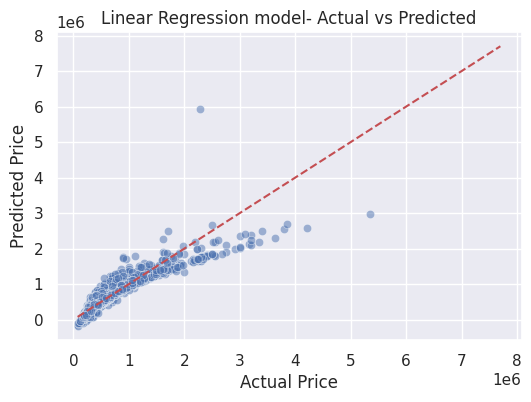

In [191]:
#Scatterplot for actual and predicted price
plt.figure(figsize=(6, 4))
sns.scatterplot(x=y_test, y=y_pred_lr, alpha=0.5)
#red dashed line to to show if plot represent perfect predictions
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
#labeling title and axis
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Linear Regression model- Actual vs Predicted')
plt.show()

The scatter plot of actual vs predicted prices confirm our model performs well.There are clusters near red dash line,which represents perfect predictions.Datapoints above line shows model underpredictions and points below shows models over prediction.In our plot,datapoints are seen away which is luxuary homes priced above $2 million.


In summary,our linear regression model has high performance and prediction power.However, since linear models assume a straight-line relationship, they may not fully capture nonlinear patterns or accurately predict high-priced outliers. To improve model accuracy and deal with high priced outliers, advanced models such as Random Forest or Gradient Boosting can be explored. These models can better handle non-linearities and help identify the best-fit model through comparison of evaluation metrics like RMSE, MAE, and R².



---



<br>


Linear Regression Evaluation:
MAE:  72102.7390
RMSE: 143452.1097
R²:   0.8577


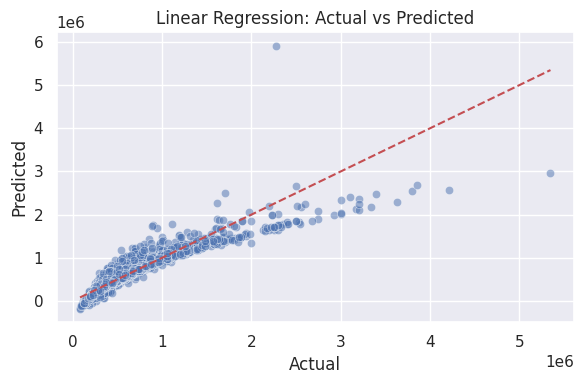


Ridge Regression Evaluation:
MAE:  72100.5546
RMSE: 143449.8486
R²:   0.8577


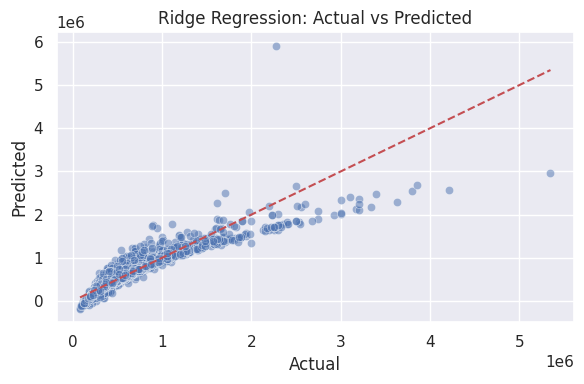


Random Forest Evaluation:
MAE:  18400.3705
RMSE: 87172.9322
R²:   0.9474


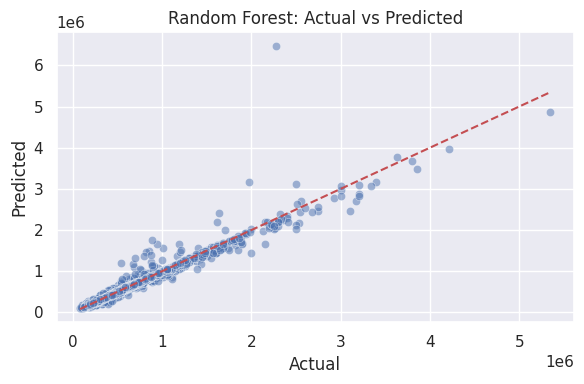


XGBoost Evaluation:
MAE:  24836.7039
RMSE: 74340.4549
R²:   0.9618


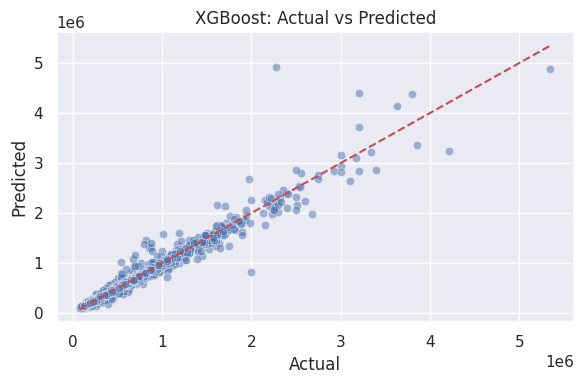


 Model Comparison:
               Model      MAE      RMSE   R2
0  Linear Regression 72102.74 143452.11 0.86
1   Ridge Regression 72100.55 143449.85 0.86
2      Random Forest 18400.37  87172.93 0.95
3            XGBoost 24836.70  74340.45 0.96

 Best model based on R²: XGBoost


In [192]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Define Function
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)

    print(f"\n{name} Evaluation:")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"R²:   {r2:.4f}")

    # Plot
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_true, y=y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{name}: Actual vs Predicted")
    plt.tight_layout()
    plt.show()

    return {'Model': name, 'MAE': mae, 'RMSE': rmse, 'R2': r2}


# LR Model
lin_model = LinearRegression()
lin_model.fit(x_train_scaled, y_train)
y_pred_lr = lin_model.predict(x_test_scaled)
lin_results = evaluate_model("Linear Regression", y_test, y_pred_lr)

# RR Model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(x_test_scaled)
ridge_results = evaluate_model("Ridge Regression", y_test, y_pred_ridge)

# RF Model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(x_train_scaled, y_train)
y_pred_rf = rf_model.predict(x_test_scaled)
rf_results = evaluate_model("Random Forest", y_test, y_pred_rf)

# XGBoost Model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(x_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(x_test_scaled)
xgb_results = evaluate_model("XGBoost", y_test, y_pred_xgb)

results_df = pd.DataFrame([lin_results, ridge_results, rf_results, xgb_results])
print("\n Model Comparison:")
print(results_df)

best_model = results_df.sort_values(by="R2", ascending=False).iloc[0]
print(f"\n Best model based on R²: {best_model['Model']}")


# **MODEL EVALUATION**
We trained and evaluated four regression models, that being Linear Regression, Ridge Regression, Random Forest, and XGBoost. Each model was assesed under Mean Basolute Error (MAE), Root Mean Squared Error (RMSE) and R Squared (R^2 Score). We plotted Predicted vs actual values to visually asses each model's performance.

**Linear and Ridge Regression** performed similarly ar R values around .86.

**Random Forest** showed significant improvements, reducing error and increasing R value to .94.

**XGBoost** outperformed all other models with the lowest RMSE and highest R values of .96 indicating excellent prediction accuracy and model fit.

# **Model Performance Comparison: Actual vs Predicted Prices**

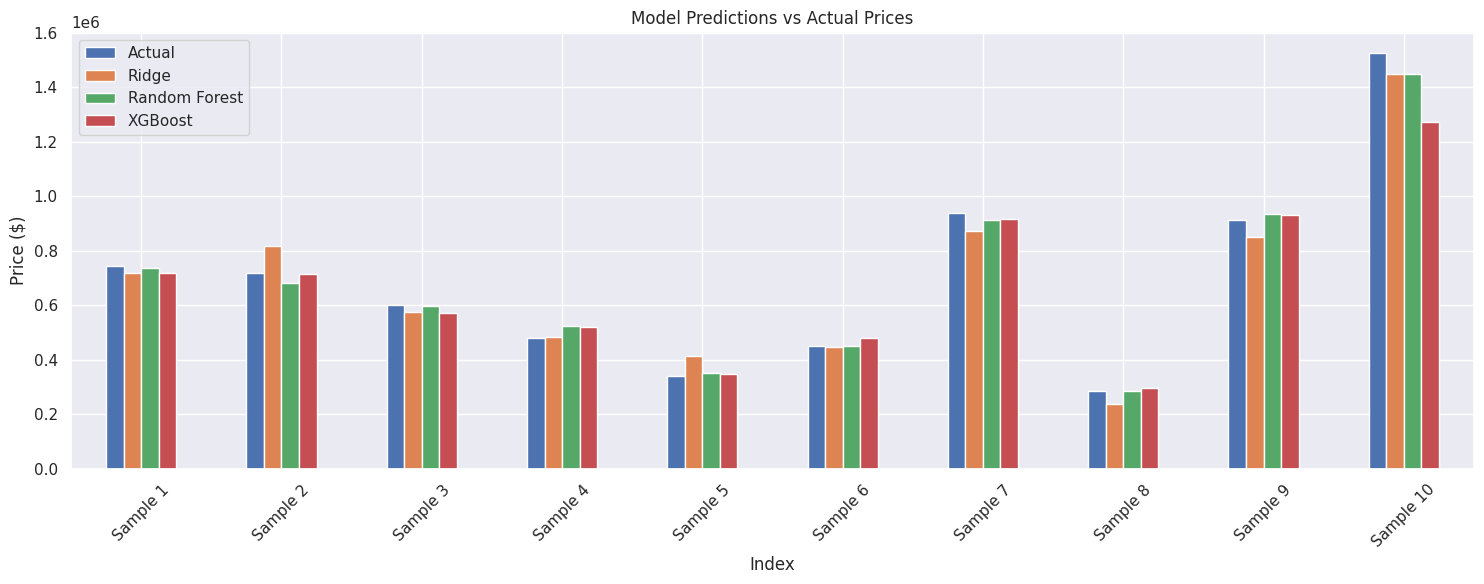

In [193]:
# Create comparison DataFrame using all models
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Ridge': y_pred_ridge,        #Predicted prices from the Ridge Regression model
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb     #Predicted prices from the Random Forest model
}, index=y_test.index).head(10)       # Keep the first 10 for plotting



# Plot with correct figure size and labels
comparison_df.index = [f"Sample {i+1}" for i in range(len(comparison_df))]
ax = comparison_df.plot(kind='bar', figsize=(15, 6))
ax.set_ylabel("Price ($)")
ax.set_xlabel("Index")
ax.set_title("Model Predictions vs Actual Prices")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart compares actual house prices with predictions generated by  regression models—Linear,Ridge Regression, Random Forest, and XGBoost for a sample of 10 properties from the test dataset. The x axis represents the sample houses, while the y axis shows property prices in dollars. For each sample, four bars are plotted side by side: the actual price, followed by the predicted prices from Ridge, Random Forest, and XGBoost models.

From the visualization, it is clear that the predicted prices from all models follow the general upward and downward trends of the actual prices, suggesting that each model has learned the overall patterns in the data. However, there are noticeable differences in accuracy and consistency between the models. XGBoost predictions are consistently closer to the actual prices for most samples, showing minimal deviation, which aligns with its higher R² score from the evaluation metrics. Random Forest also performs well but occasionally overestimates or underestimates, particularly for samples with extreme prices. Ridge Regression tends to show larger deviations from the actual values, especially for higher-priced homes, indicating that its linear nature might limit its ability to capture complex, non-linear relationships present in the housing market.

Overall, the visual comparison demonstrates that XGBoost, provide the most accurate and reliable predictions for this dataset, while linear methods like Ridge Regression may struggle with more complex pricing patterns.

<br>

# **Future Improvement**

 We plan to expand the dataset by adding features like school ratings, walkability scores, and access to public transport.
 Other data such as neighborhood demographics, local amenities, and community facilities will improve the accuracy of our predictions.






<br>

# **Conclusion/Key findings:**

Given the data set "house_sales", we cleaned, performed EDA, and trained & evaluated machine learning models. We found a notable variables that influence price.The highest predictors of price are size, grade, location, amenities of the location. One notable finding is that listings during the spring/summer tend to sell at higher prices.

<br>


# **Recommendations**
For prospetive buyers looking for a discount to homes, size will play an important factor when evaluating a properties worth.

Grade played an important role for price as well, remodelers or discount shoppers should take note of grades.

Amenities such as waterfront and view can prove to be huge discount for people looking for homes that don't need such things.

Location of the porperty played an big role in price. Expensive houses clustered together geographically. This suggests a possible unknown variable that could be influencing prices. Buyers looking for discounts should avoid certain locations. Further exploration is also recommended.

Listings during summer and spring tended to command higher premiums. Possible factors influencing this could be a whole host of things. Further exploration is recommended.

Age affected the price moderately in a negative manner. With a correlation coefficient of -.54, age's effects on price were moderate. Buyers looking for opportunities can also consider age as an important factor.
